# Introduction
Hello my Name is Nurfaldi, I'm a data scientist and today I want to show you how to do unsupervised learning and clustering using PCA, KMeans and Agglomerative Clustering. Enjoy! 

In [1]:
# SQL Query to fetch data from Google cloud platform with filter:
## Odd CUST_ID only
SQLQuery = (
'''
SELECT *
FROM `ftds-hacktiv8-project.phase1_assignments.credit-card-information` 
WHERE MOD(CUST_ID, 2) != 0;
'''
)

## Description

### Objective

In this project, I'll try to do customer segmentation using several tools like PCA, Kmeans and Agglomerative Clustering. We got serveral features related to credit card users like purchases, balance, and cash advance. Along the way we would also try to analyze the data and find insight that can helps us find costumers pattern.

### Problem Statement

The main problem that I wanted to answer is how we can split our costumer into multiple segment and how we can analyze each segment. To answer this we will try to reduce dimensionality using PCA and build machine learning model using KMeans and Agglomerative clustering. Finally we will also explore if there is any connection between our initial analysis and our model.  

# Import Libraries

In [2]:
# Import library

# Standard Python Libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Science Libraries
from sklearn.model_selection import train_test_split

# Missing Value Handler
from sklearn.impute import SimpleImputer

## Outlier handler
from feature_engine.outliers import Winsorizer

## Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## Imbalance samplers
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN

## Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

## Pipeline for imbalanced datasets
from imblearn.pipeline import Pipeline, make_pipeline

## Machine Learning models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

### PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


## Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Cross validation
from sklearn.model_selection import cross_val_score

## Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.metrics import silhouette_score,silhouette_samples

import mglearn

In [3]:
#Setting Seaborn color scheme
sns.set_theme(style="whitegrid")

# Data Loading

In [4]:
#import data
df = pd.read_csv('../data/customer_clustering.csv')

#Calling dataframe head and tail
df_head_tail = pd.concat([df.head(3), df.tail(3)])
df_head_tail.T

0         1            2     \
CUST_ID                           3091.000000  5069.000  6075.000000   
BALANCE                              3.833185     0.000   757.964752   
BALANCE_FREQUENCY                    0.125000     0.000     0.875000   
PURCHASES                           45.000000   176.030   157.400000   
ONEOFF_PURCHASES                    45.000000   176.030   157.400000   
INSTALLMENTS_PURCHASES               0.000000     0.000     0.000000   
CASH_ADVANCE                         0.000000     0.000     0.000000   
PURCHASES_FREQUENCY                  0.125000     0.125     0.125000   
ONEOFF_PURCHASES_FREQUENCY           0.125000     0.125     0.125000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000     0.000000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000     0.000000   
CASH_ADVANCE_TRX                     0.000000     0.000     0.000000   
PURCHASES_TRX                        1.000000     1.000     6.000000   
CREDIT_LIMIT                       500.000000  7000.000  1200.000000   
PAYMENTS                             0.000000     0.000  1494.480376   
MINIMUM_PAYMENTS                          NaN       NaN  2638.598410   
PRC_FULL_PAYMENT                     0.000000     0.000     0.000000   
TENURE                               8.000000     8.000     8.000000   

                                         4472         4473          4474  
CUST_ID                           7347.000000  8447.000000   1995.000000  
BALANCE                           1322.818587  1060.391273   3447.674222  
BALANCE_FREQUENCY                    1.000000     1.000000      1.000000  
PURCHASES                            0.000000     0.000000    205.000000  
ONEOFF_PURCHASES                     0.000000     0.000000    205.000000  
INSTALLMENTS_PURCHASES               0.000000     0.000000      0.000000  
CASH_ADVANCE                       762.301096  1475.858013   4548.057776  
PURCHASES_FREQUENCY                  0.000000     0.000000      0.090909  
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000      0.090909  
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000      0.000000  
CASH_ADVANCE_FREQUENCY               0.545455     0.545455      0.545455  
CASH_ADVANCE_TRX                    11.000000    10.000000      7.000000  
PURCHASES_TRX                        0.000000     0.000000      1.000000  
CREDIT_LIMIT                      1500.000000  2000.000000  10500.000000  
PAYMENTS                          1035.627320   407.360560    665.239171  
MINIMUM_PAYMENTS                   312.835530   277.084736    817.844662  
PRC_FULL_PAYMENT                     0.000000     0.000000      0.000000  
TENURE                              11.000000    11.000000     11.000000

Data description:
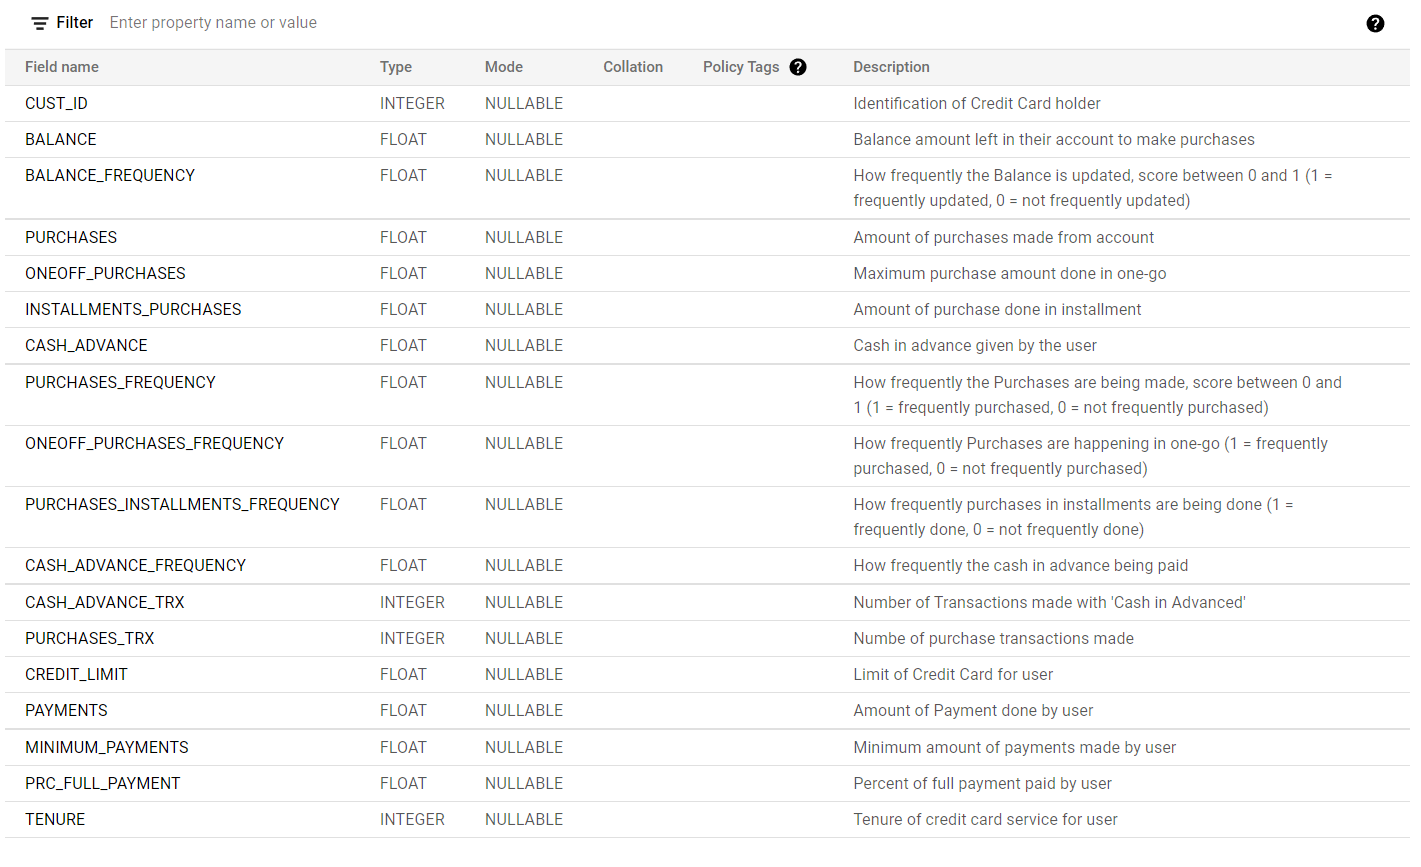

In [5]:
df.shape

(4475, 18)

We can see that our data is a little bit small in number for machine learning algorithm. this can affect our result later.

In [6]:
#Duplicate data for backup
df_copy = df.copy()

# Exploratory Data Analysis (EDA)

## Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

All of the data is in float or integer format, and it seems that all the columns are numerical

In [8]:
#Listing all columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

Generally the column name are orderly and ready for exploration and refined cleaning. It seems that there is no string type data in this file.

In [10]:
#Checking for duplicated rows
df.duplicated().sum()

0

There is no duplicated column in our data

In [11]:
#confirming the count of null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It looks like that there is Null values in the MINIMUM_PAYMENTS column, lets explore the column

In [12]:
# Checking the column characteristics
df['MINIMUM_PAYMENTS'].describe()

count     4320.000000
mean       873.976757
std       2436.877272
min          0.019163
25%        168.590144
50%        313.980229
75%        819.371080
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

It seems that the minimum value is more than 0, since this column value is minimum ammount of payement made by the user, I'm going to assume that if the user never made a payement than the data would be Nan since there is no input. So I'm going to replace the Nan with zero

In [13]:
# Replacing NaN with zero
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we will explore the data

## Data Types Exploration

We will start by checking every data features for pattern. First we want to see potential categorical features. We can start by looking at unique values for each column and look for low count unique values. 

In [14]:
#Checking Unique Values of every columns
df.nunique().sort_values()

TENURE                                 7
BALANCE_FREQUENCY                     43
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_FREQUENCY                   46
PRC_FULL_PAYMENT                      47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
ONEOFF_PURCHASES                    2093
CASH_ADVANCE                        2169
INSTALLMENTS_PURCHASES              2292
PURCHASES                           3203
MINIMUM_PAYMENTS                    4320
PAYMENTS                            4362
BALANCE                             4433
CUST_ID                             4475
dtype: int64

From the value and desciption we can see that all columns are numerical

In [15]:
#Spliting numerical and categorical columns
col_num = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
col_cat = []

In [16]:
#setting numerical, categorical ordinal and categorical nominal columns list
col_cat_ordinal = []
col_cat_nominal = []

In [17]:
df.describe().T

count         mean          std   min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.0   
BALANCE                           4475.0  1563.205717  2072.045789   0.0   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.0   
PURCHASES                         4475.0  1003.251343  2060.034730   0.0   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.0   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.0   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.0   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.0   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.0   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.0   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.0   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.0   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.0   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.0   
MINIMUM_PAYMENTS                  4475.0   843.704936  2399.621735   0.0   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.0   
TENURE                            4475.0    11.518212     1.328925   6.0   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   162.761527   290.977264   785.953474   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## Corellation Analysis

In [18]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<AxesSubplot:>

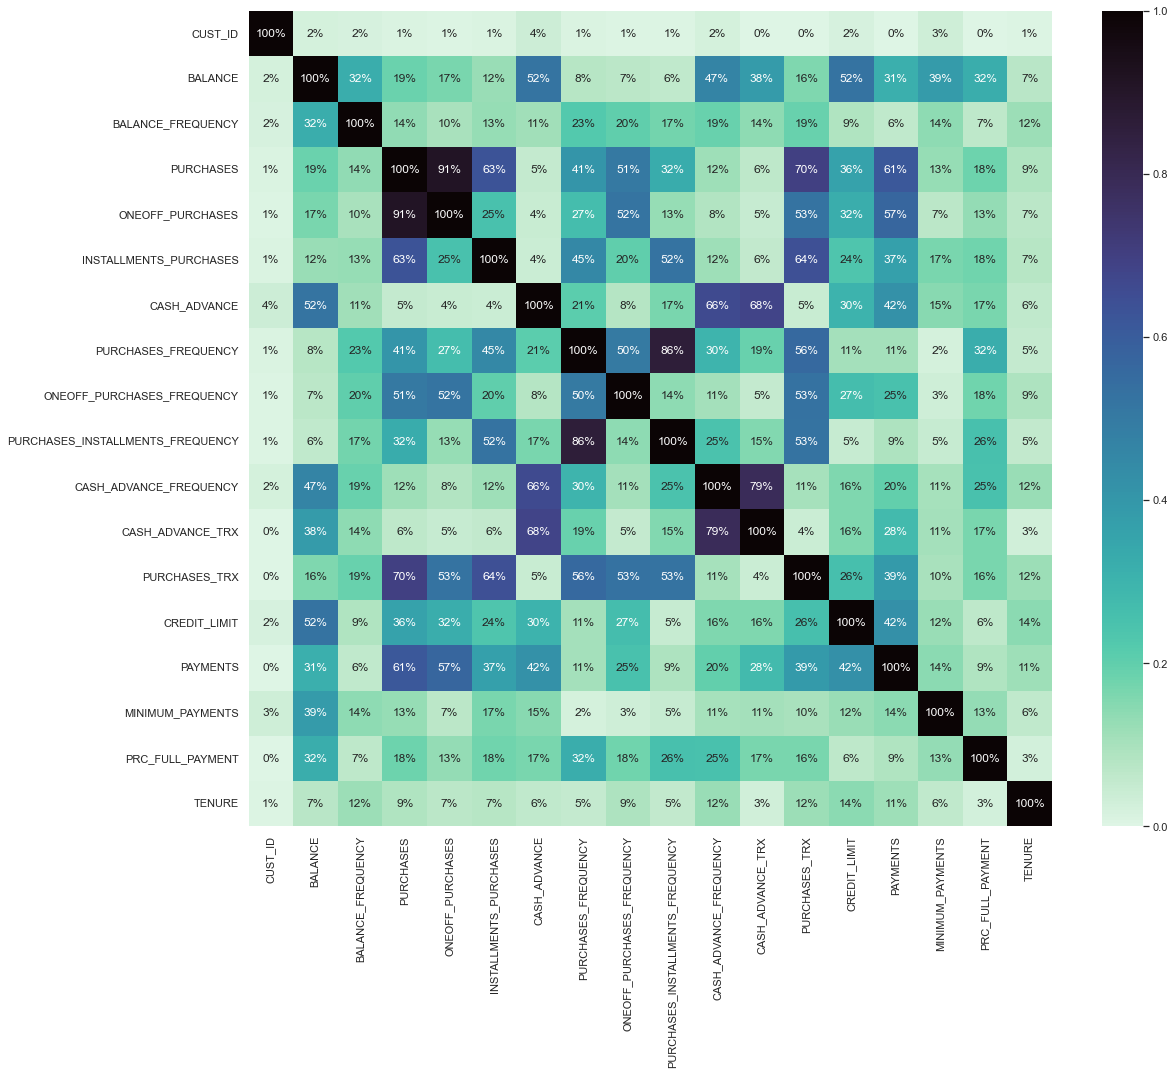

In [19]:
#Exploring corellation
cor_matrix = df.corr().abs()

plt.figure(figsize = (18,15))
sns.heatmap(cor_matrix, annot=True, fmt=".0%", vmin=0, vmax=1, cmap="mako_r")

In [20]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

From the heatmap, we can see there are some highly corellated features like PURCHASES and ONEOFF_PURCHASES, PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX. 

To simplify the dimension of our model, I'll try to take several representation from the features with high corelation.

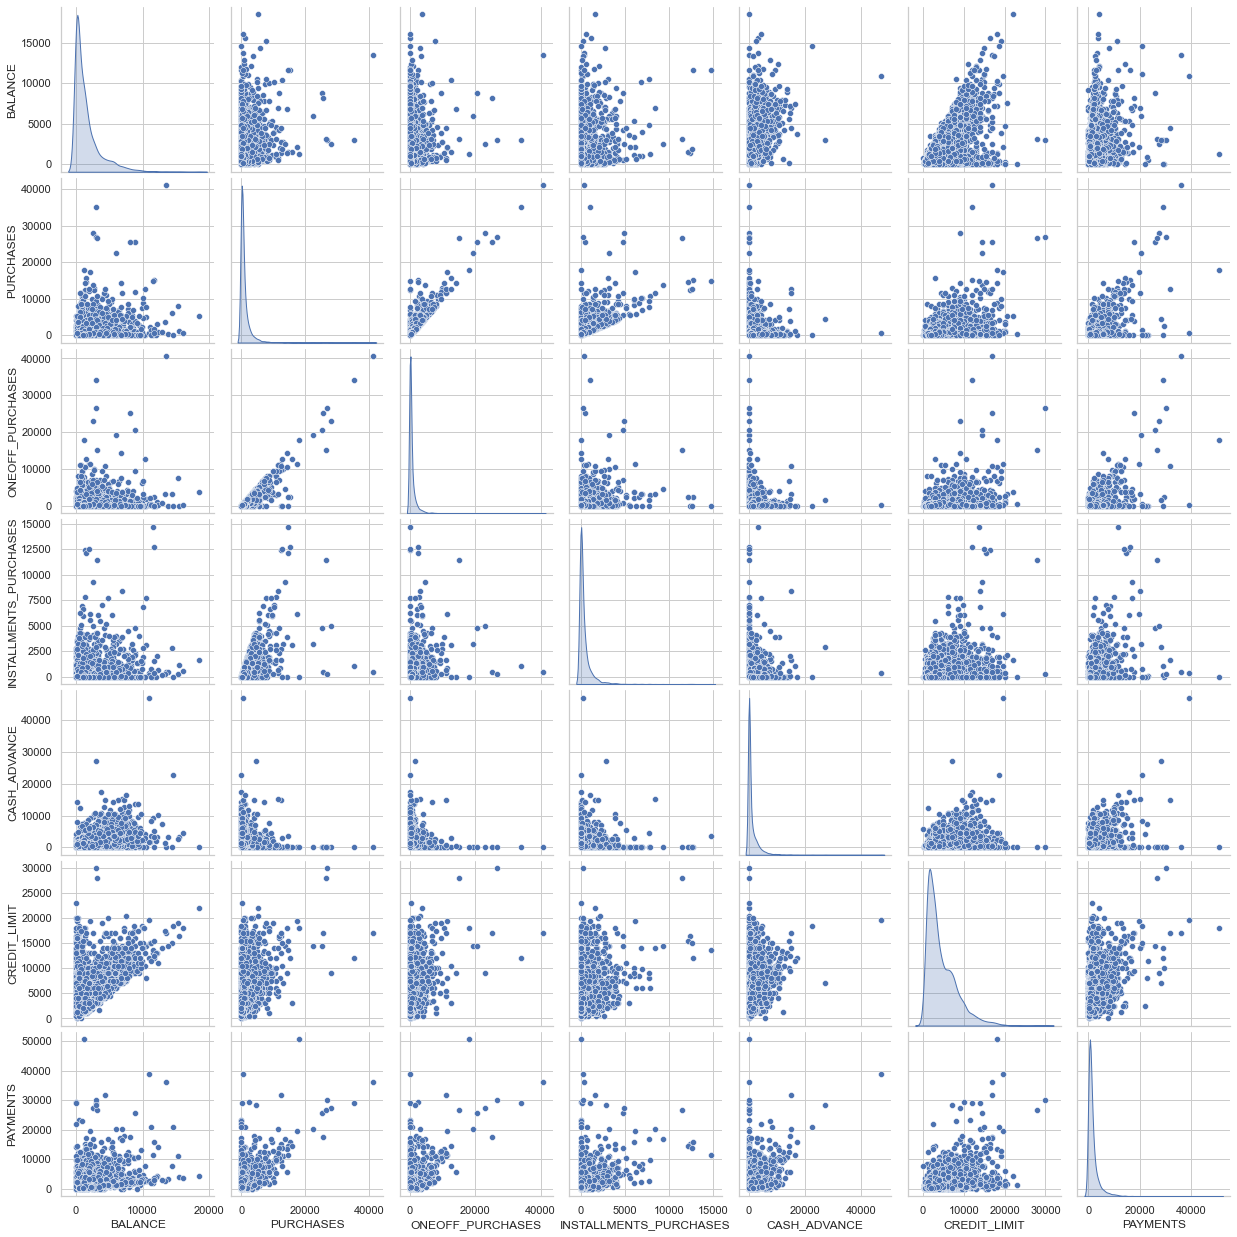

In [21]:
# Plotting Histogram and Scatter plots for every columns
sns.pairplot(df[['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE' ,
                 'CREDIT_LIMIT', 'PAYMENTS']]
             ,diag_kind='kde')

we can see here that the distribution of the values are skewed to the rigt. it seems that there are lower purchase, limit and balance credit card than the higher one which is makes sense

## Column Patterns

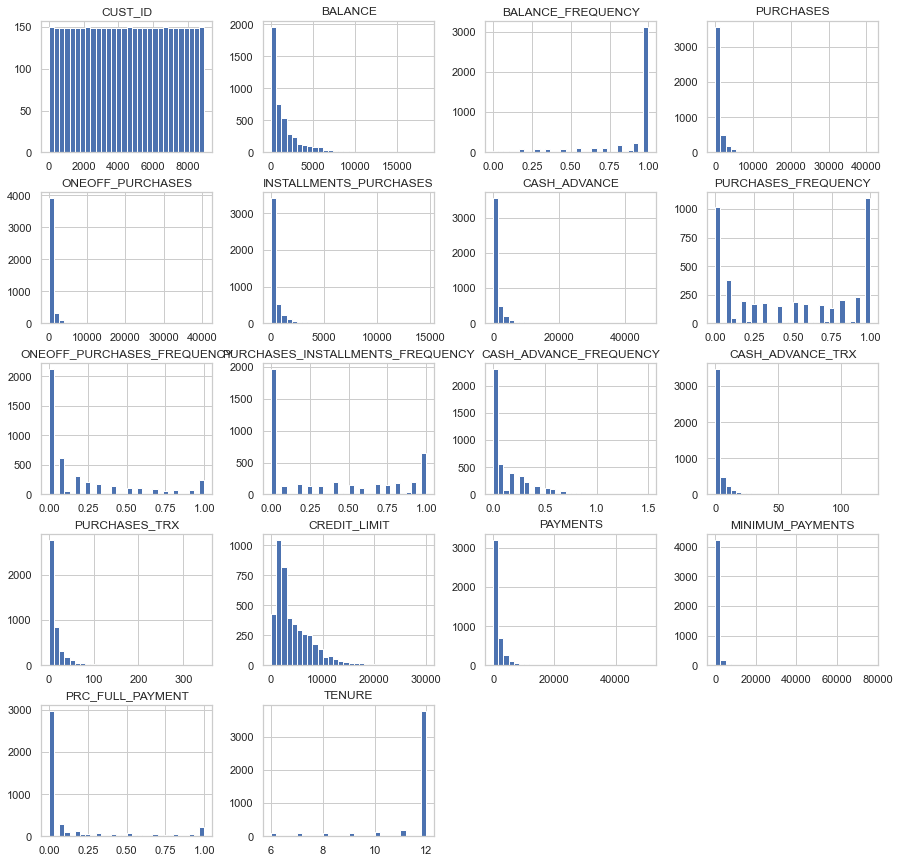

In [22]:
#plotting histogram for every numerical column
df.hist(bins=30, figsize=(15, 15));

In [23]:
#skew for each column
for column in df.select_dtypes(include=np.number).columns: 
    print(column, 'Skewness Value : ', df[column].skew())

CUST_ID Skewness Value :  0.0
BALANCE Skewness Value :  2.3290088807150915
BALANCE_FREQUENCY Skewness Value :  -2.026529776439142
PURCHASES Skewness Value :  7.071705718331177
ONEOFF_PURCHASES Skewness Value :  9.951056583113456
INSTALLMENTS_PURCHASES Skewness Value :  6.330629906494809
CASH_ADVANCE Skewness Value :  5.638109294257693
PURCHASES_FREQUENCY Skewness Value :  0.05875497991848613
ONEOFF_PURCHASES_FREQUENCY Skewness Value :  1.5483193819148602
PURCHASES_INSTALLMENTS_FREQUENCY Skewness Value :  0.5082957786202944
CASH_ADVANCE_FREQUENCY Skewness Value :  1.8342106501962343
CASH_ADVANCE_TRX Skewness Value :  6.420103784668197
PURCHASES_TRX Skewness Value :  4.747507133980154
CREDIT_LIMIT Skewness Value :  1.498947716941148
PAYMENTS Skewness Value :  5.747503259811283
MINIMUM_PAYMENTS Skewness Value :  14.8673871686417
PRC_FULL_PAYMENT Skewness Value :  1.9752382754788178
TENURE Skewness Value :  -2.954158581529189


In [24]:
#seperating by skewness
col_num_normal = [] 
col_num_skewed = []
col_num_skewed_extreme = []

for column in col_num:
    if abs(df[column].skew()) > 1.2:
        col_num_skewed_extreme.append(column)
    elif abs(df[column].skew()) > 0.5:
        col_num_skewed.append(column)
    else:
        col_num_normal.append(column)
        

print('extremely skewed: ', col_num_skewed_extreme) 
print('skewed:', col_num_skewed)
print('normal:', col_num_normal)

extremely skewed:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
skewed: ['PURCHASES_INSTALLMENTS_FREQUENCY']
normal: ['CUST_ID', 'PURCHASES_FREQUENCY']


As we can see from the histogram and the skewness calculation, that almost all column are skewed except purchases frequency. CUST_ID doesn't count because it is unique identifier number

next we want to define function to plot histograms and boxplots for each feature to detect outliers

In [25]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

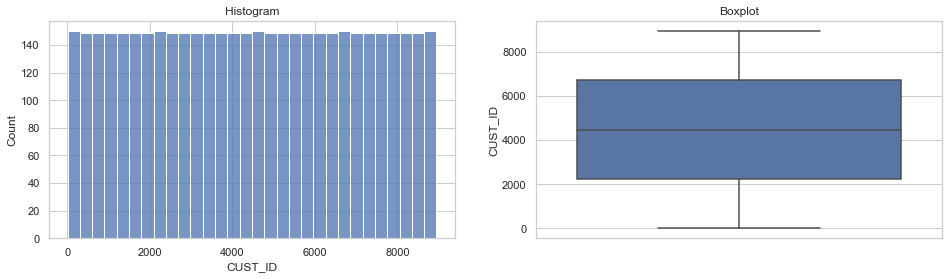


Skewness Value :  0.0


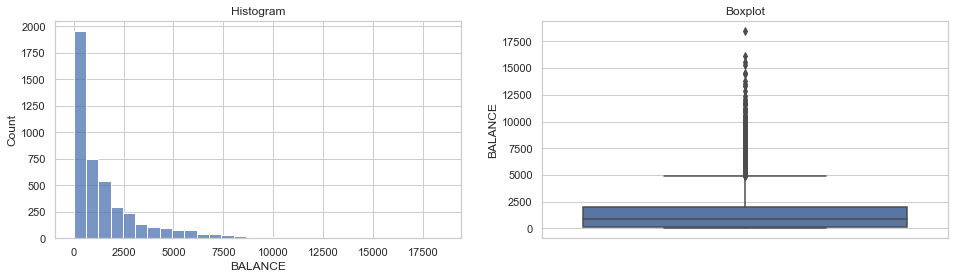


Skewness Value :  2.3290088807150915


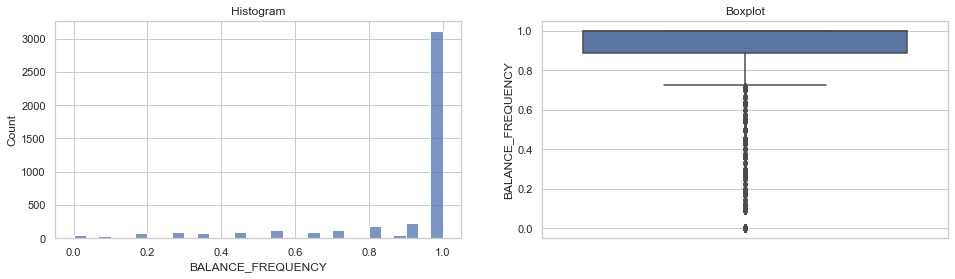


Skewness Value :  -2.026529776439142


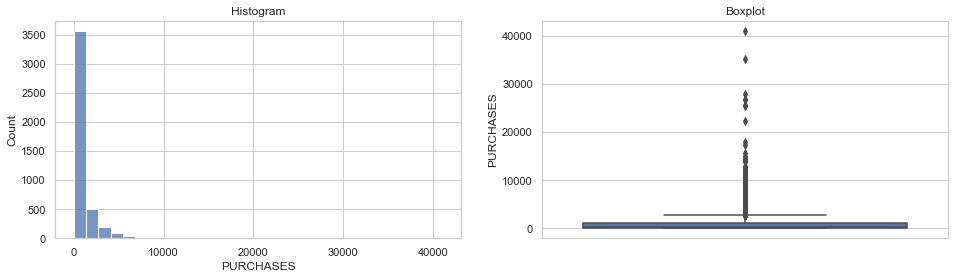


Skewness Value :  7.071705718331177


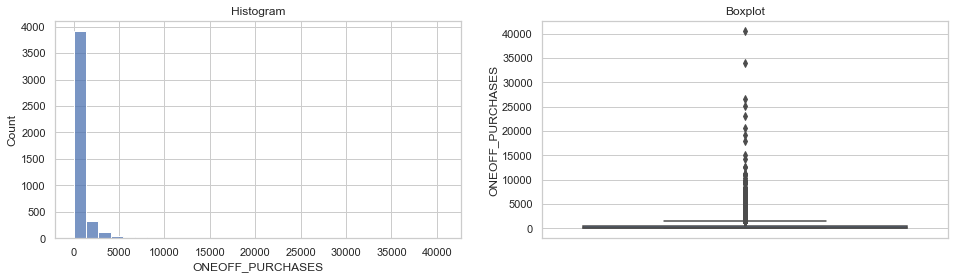


Skewness Value :  9.951056583113456


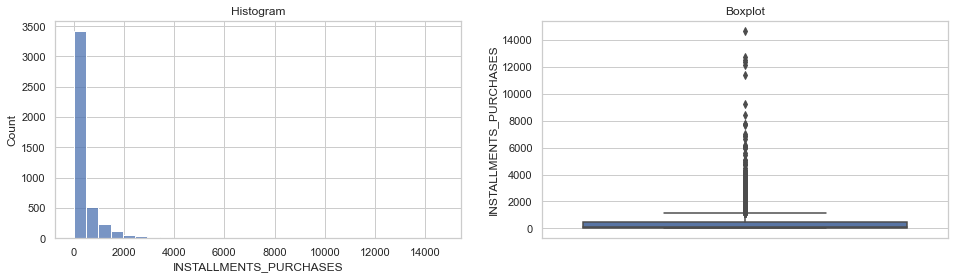


Skewness Value :  6.330629906494809


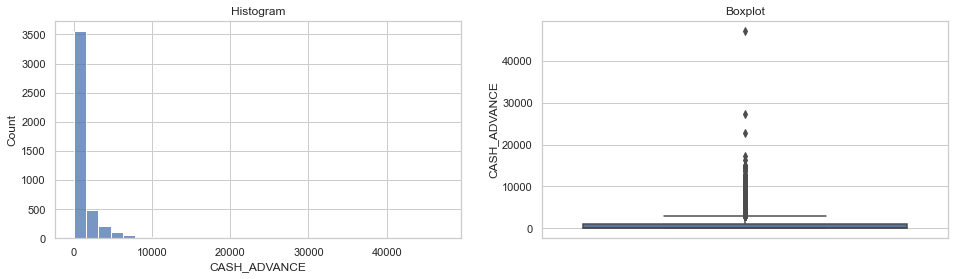


Skewness Value :  5.638109294257693


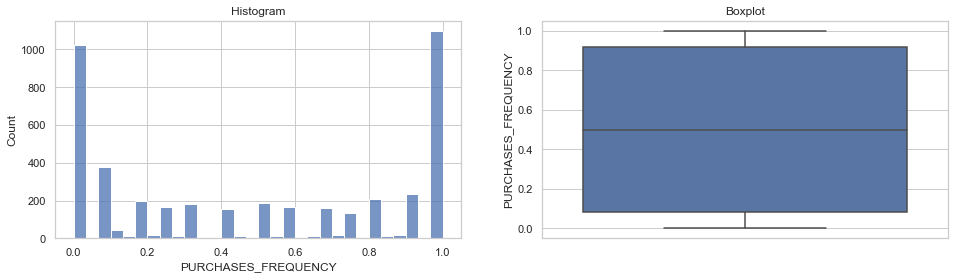


Skewness Value :  0.05875497991848613


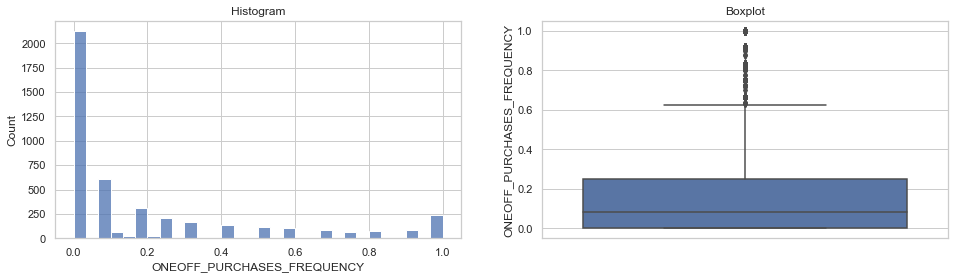


Skewness Value :  1.5483193819148602


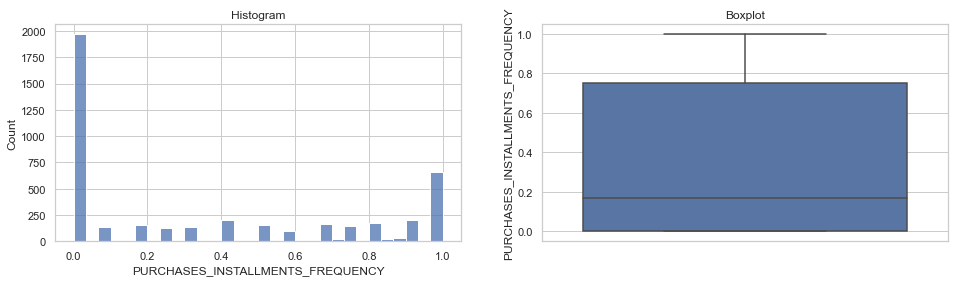


Skewness Value :  0.5082957786202944


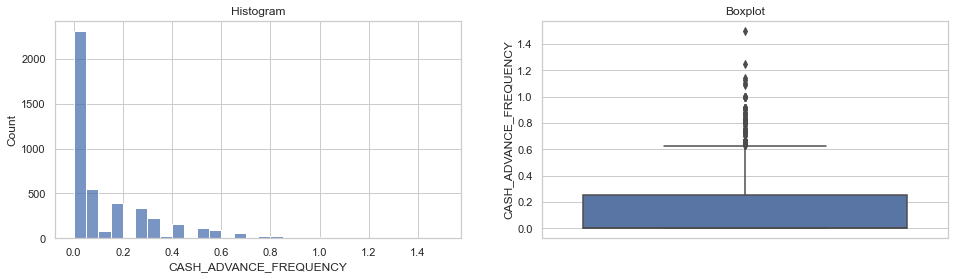


Skewness Value :  1.8342106501962343


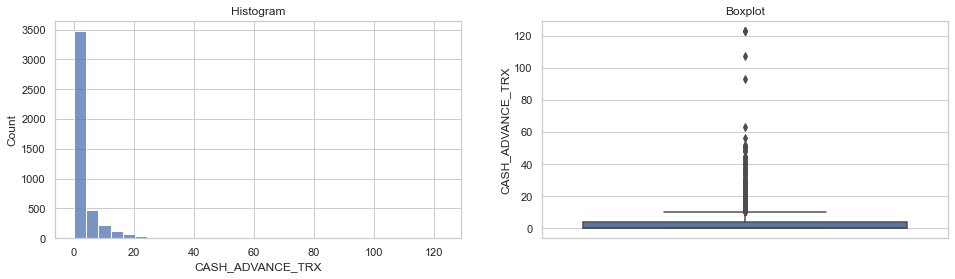


Skewness Value :  6.420103784668197


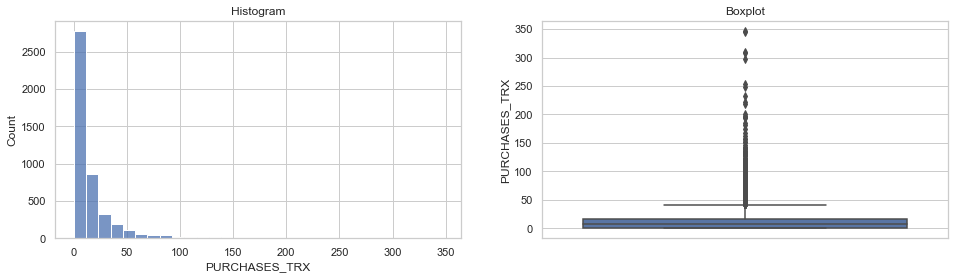


Skewness Value :  4.747507133980154


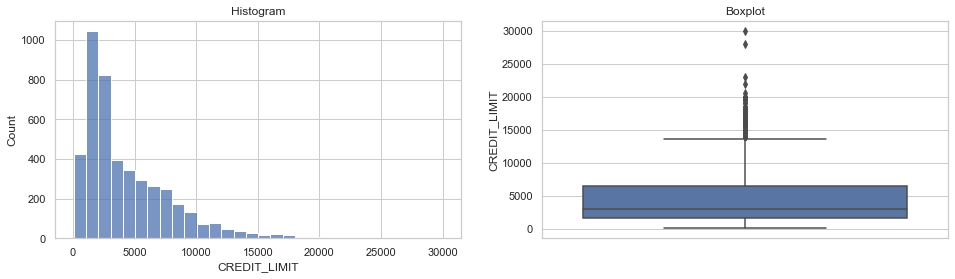


Skewness Value :  1.498947716941148


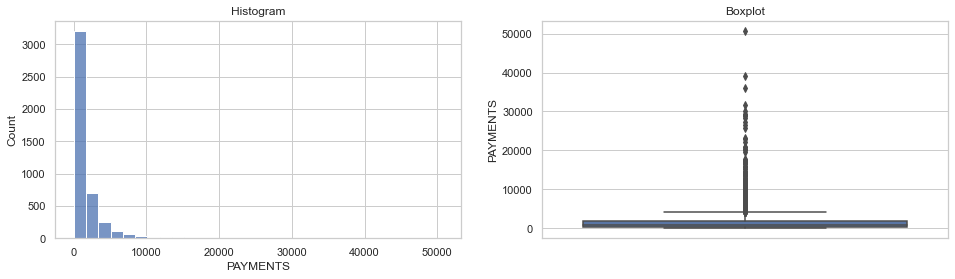


Skewness Value :  5.747503259811283


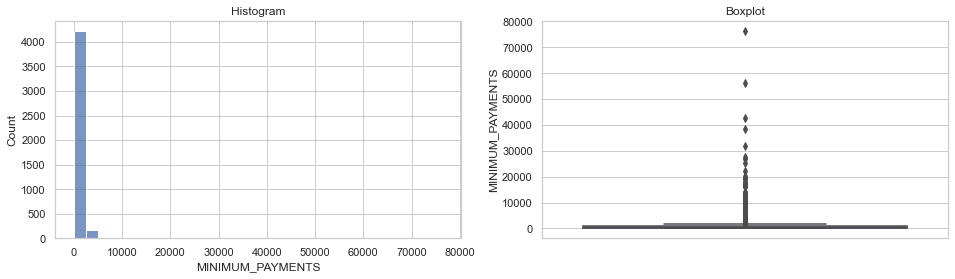


Skewness Value :  14.8673871686417


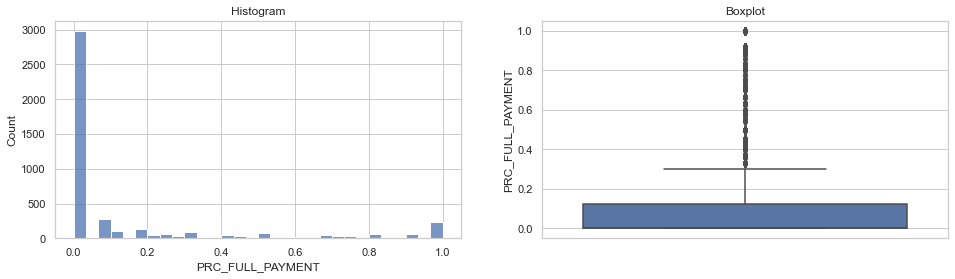


Skewness Value :  1.9752382754788178


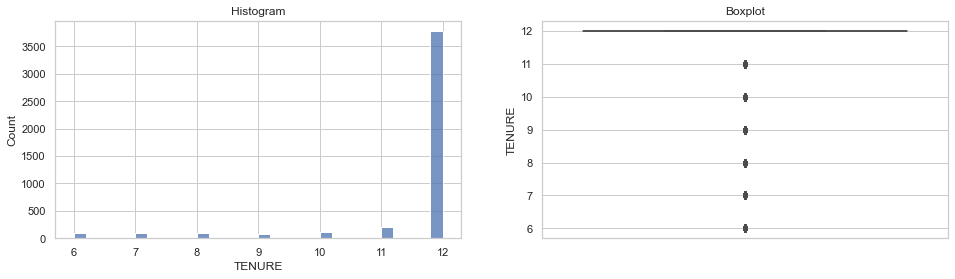


Skewness Value :  -2.954158581529189


In [26]:
for column in df.select_dtypes(include=np.number).columns: 
    diagnostic_plots(df, column)
    print('\nSkewness Value : ', df[column].skew())

After analyzing the plots, we found so many features that have outliers. we will use the function below to filter the outliers.

In [27]:
def outlier_detector(df, column):
    #Creating upper and lower boundaries
    Q1 = np.percentile(df[column], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df[column], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    upper = df[column] >= (Q3+1.5*IQR)
    lower = df[column] <= (Q1-1.5*IQR)
    
    upper_rat = upper.sum()/upper.count()
    lower_rat = lower.sum()/lower.count()
    
    #checking how many value and percent outside the boundaries
    return column, upper_rat, lower_rat

def outlier_lister(df, columns):
    
    outlier_list = []
    print("The outliers are:")
    for a in columns:
        
        col, upper_rat, lower_rat = outlier_detector(df,a)
        
        if upper_rat + lower_rat != 0:
            print(col, 'with outliers ratio of :' ,upper_rat + lower_rat)
            outlier_list.append(a)
    
    return outlier_list

outlier_list = outlier_lister(df, col_num)

print(len(col_num), 'out of', len(outlier_list), 'columns contain outliers')

The outliers are:
BALANCE with outliers ratio of : 0.08022346368715083
BALANCE_FREQUENCY with outliers ratio of : 0.16715083798882682
PURCHASES with outliers ratio of : 0.09474860335195531
ONEOFF_PURCHASES with outliers ratio of : 0.11687150837988827
INSTALLMENTS_PURCHASES with outliers ratio of : 0.0987709497206704
CASH_ADVANCE with outliers ratio of : 0.11262569832402235
ONEOFF_PURCHASES_FREQUENCY with outliers ratio of : 0.1246927374301676
CASH_ADVANCE_FREQUENCY with outliers ratio of : 0.03910614525139665
CASH_ADVANCE_TRX with outliers ratio of : 0.1077094972067039
PURCHASES_TRX with outliers ratio of : 0.09162011173184358
CREDIT_LIMIT with outliers ratio of : 0.026815642458100558
PAYMENTS with outliers ratio of : 0.09251396648044692
MINIMUM_PAYMENTS with outliers ratio of : 0.10614525139664804
PRC_FULL_PAYMENT with outliers ratio of : 0.17810055865921787
TENURE with outliers ratio of : 1.844022346368715
18 out of 15 columns contain outliers


In [28]:
#outlier lists
to_drop = ['TENURE']
outlier_list = [col for col in outlier_list if col not in to_drop]
outlier_list

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

We can see that all the data contains outliers, we wont drop tenure from the lsit though because the value is capped at 12 and the majority of the value is 12

# Data Preprocessing

Now we can get into data pre-processing. in this part, we will split the data for train, test and Infernce, and then we will handle outlier, and if any we will also handle missing values.

## Get Data for Model Inference

In [29]:
df.shape

(4475, 18)

because our data only contains 4475 rows lets just take small inference

In [30]:
# Get Data for Model Inference
data_inf = df.sample(10, random_state=21)

# Remove Inference-Set from Dataset
X_train = df.drop(data_inf.index)

# Reset index and split data inference into X and y
data_inf = data_inf.reset_index(drop=True)

print('Data Size  : ', df.shape)
print('Train Size  : ', data_inf.shape)
print('inference Size  : ', X_train.shape)

Data Size  :  (4475, 18)
Train Size  :  (10, 18)
inference Size  :  (4465, 18)


In [31]:
data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     8065   395.052994           1.000000    1239.46            752.28   
1     5023  1607.551793           0.909091       0.00              0.00   
2     6679    94.110539           1.000000    1090.19              0.00   
3     6723   239.446482           0.636364       0.00              0.00   
4     4563  4164.796859           1.000000     784.63            617.54   
5     3913     3.744802           0.272727     154.50            154.50   
6      281  1237.897608           1.000000     403.38            403.38   
7     2387   470.593325           1.000000    6743.31           6182.78   
8     6039   653.004882           0.818182    2035.29           1259.58   
9     5227  1132.796058           1.000000     519.79            519.79   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  487.18      0.000000             0.666667   
1                    0.00   4078.383904             0.000000   
2                 1090.19      0.000000             1.000000   
3                    0.00    698.096182             0.000000   
4                  167.09      0.000000             0.454545   
5                    0.00      0.000000             0.083333   
6                    0.00   1593.700723             0.333333   
7                  560.53      0.000000             1.000000   
8                  775.71      0.000000             0.750000   
9                    0.00      0.000000             0.583333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.416667                          0.416667   
1                    0.000000                          0.000000   
2                    0.000000                          1.000000   
3                    0.000000                          0.000000   
4                    0.454545                          0.181818   
5                    0.083333                          0.000000   
6                    0.333333                          0.000000   
7                    1.000000                          0.666667   
8                    0.500000                          0.500000   
9                    0.583333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             14        1500.0   
1                0.583333                17              0        2500.0   
2                0.000000                 0             19        7000.0   
3                0.250000                 8              0        2000.0   
4                0.000000                 0             16        9000.0   
5                0.000000                 0              1        3800.0   
6                0.250000                11              4        1500.0   
7                0.000000                 0            122        3200.0   
8                0.000000                 0             29        9500.0   
9                0.000000                 0              8        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   401.217047        177.766827          0.000000      12  
1  3636.677131        485.333114          0.000000      12  
2  1174.739824        176.285795          0.916667      12  
3   351.850485        181.339692          0.166667      12  
4  1072.433416       1311.061985          0.000000      11  
5   178.897596         30.229283          0.000000      12  
6  2291.077923        398.248053          0.000000      12  
7  4369.008441        222.118023          0.666667      12  
8  7590.280949        319.680283          0.000000      12  
9   642.723631        436.088187          0.000000      12

From the data, I'll split 10 rows as inference. This will helps us check the performance of our model.

## Handling Outlier

As I stated above, almost all the numerical data have outliers, and we already have outlier list. we will handle the all data with outlier except our target column

In [32]:
#Outliers column
outlier_list

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [33]:
#Censoring with IQR
winsoriser_iqr = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables= outlier_list)

winsoriser_iqr.fit(X_train)

X_train_censored = winsoriser_iqr.transform(X_train)

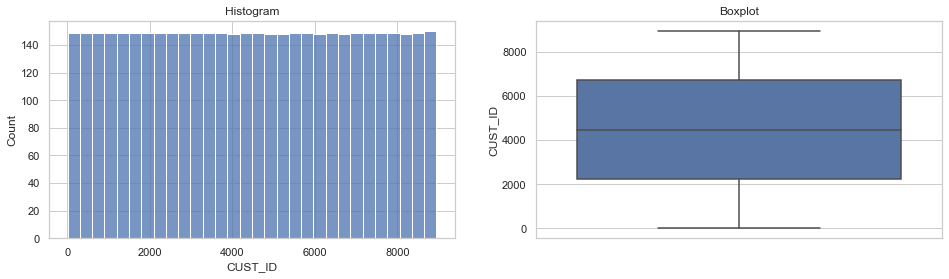


Skewness Value :  0.0012129513220170407


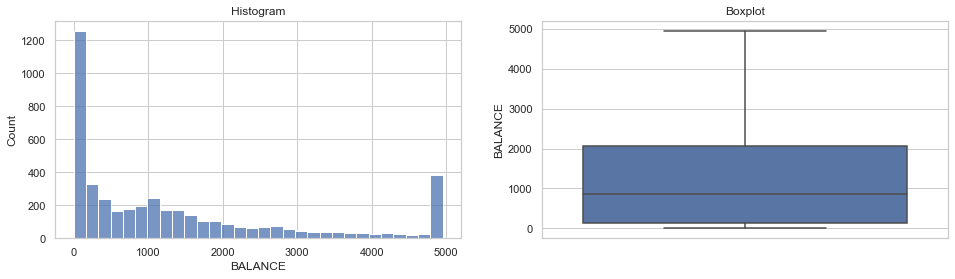


Skewness Value :  2.3275211152582247


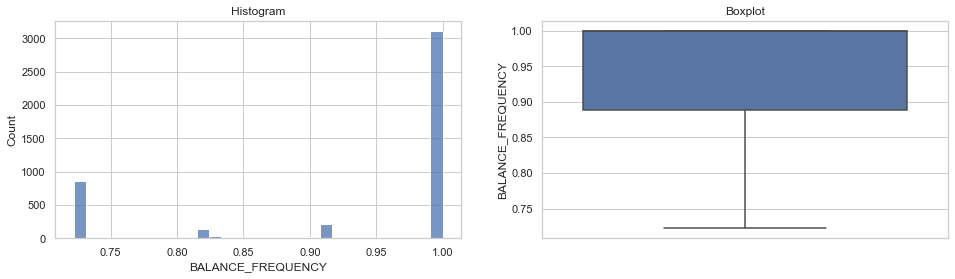


Skewness Value :  -2.027151422698675


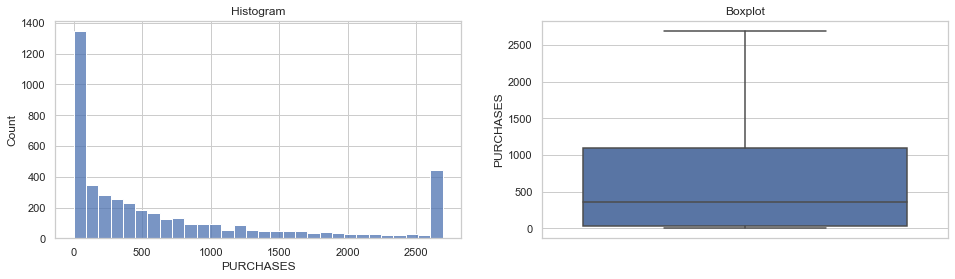


Skewness Value :  7.0809180750293566


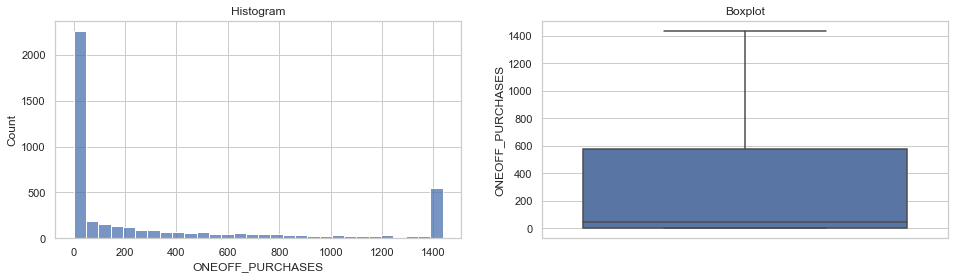


Skewness Value :  9.973248197241473


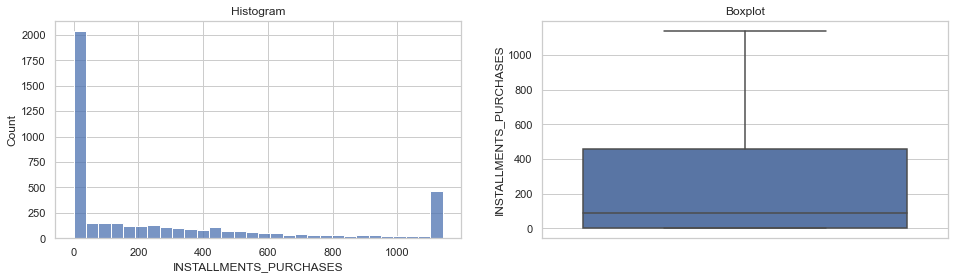


Skewness Value :  6.326948271281841


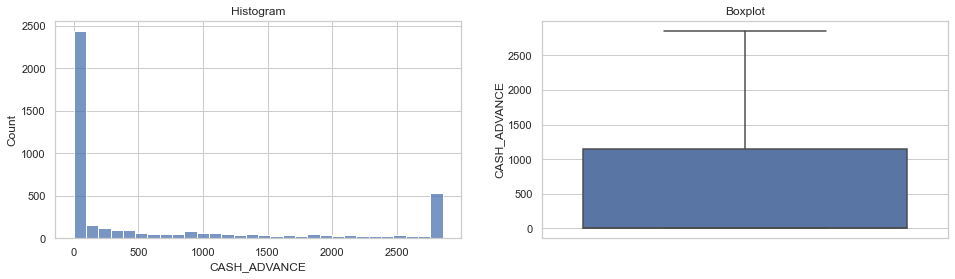


Skewness Value :  5.637571525357917


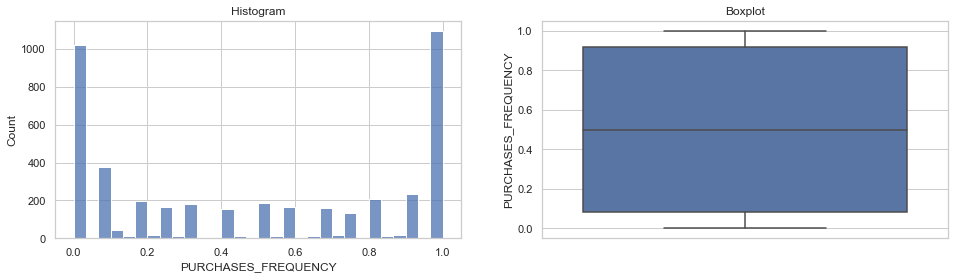


Skewness Value :  0.05885623534164946


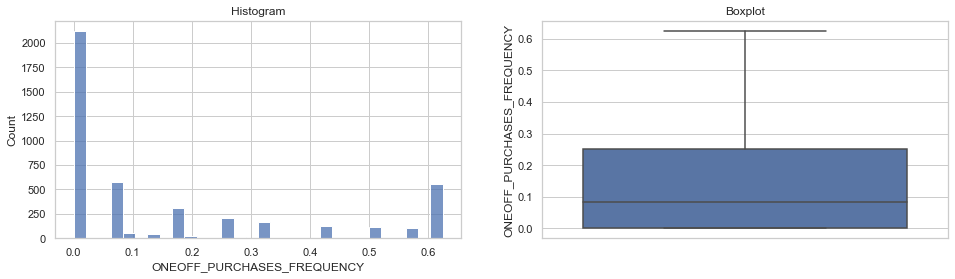


Skewness Value :  1.5512680748753263


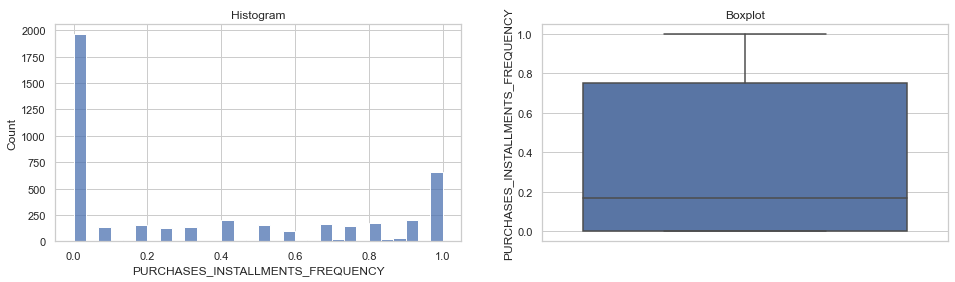


Skewness Value :  0.5074145327241137


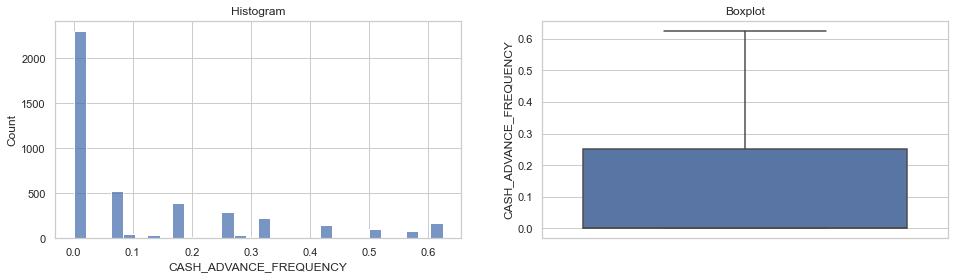


Skewness Value :  1.8345906602973054


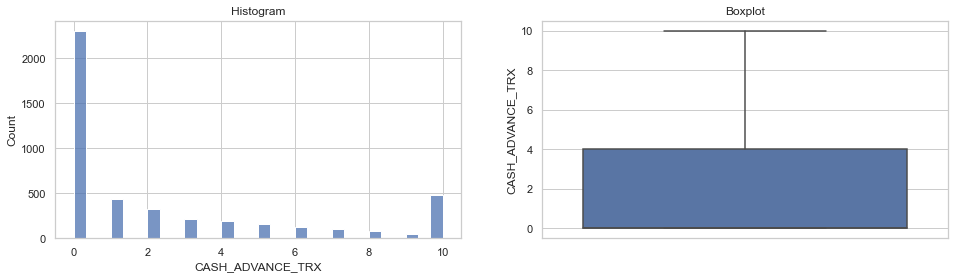


Skewness Value :  6.426050144112956


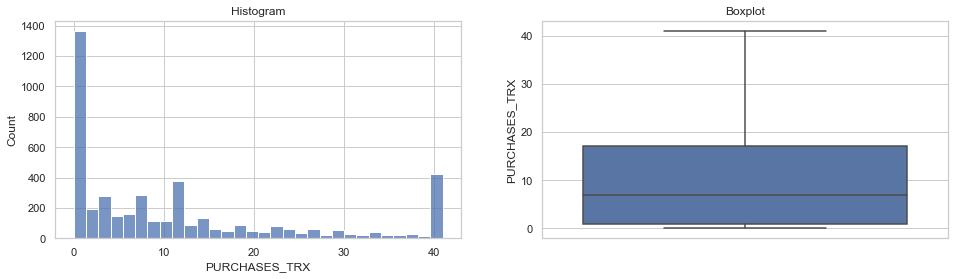


Skewness Value :  4.758032000109984


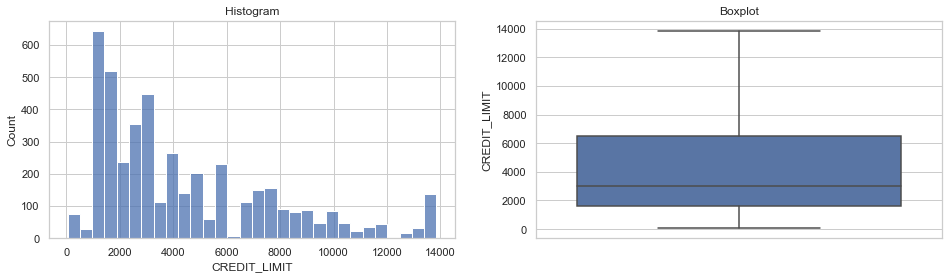


Skewness Value :  1.4996002409227813


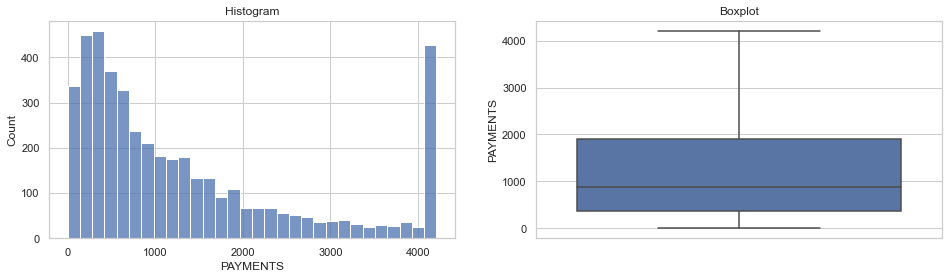


Skewness Value :  5.752803247392455


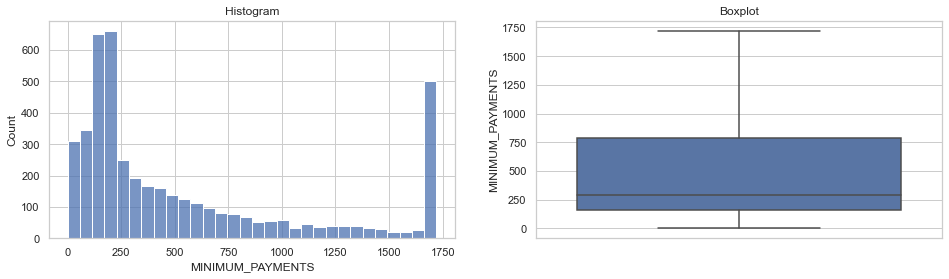


Skewness Value :  14.852405002935743


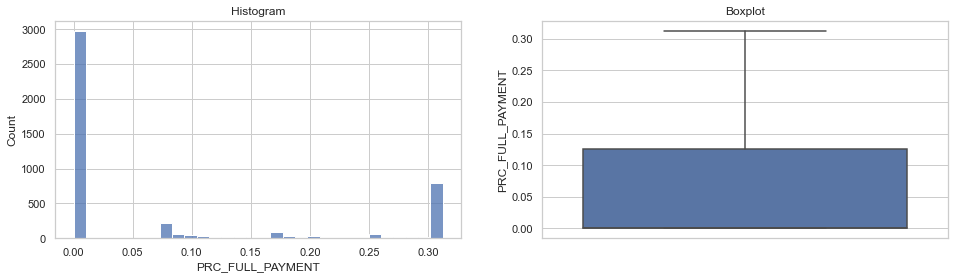


Skewness Value :  1.9764105807823376


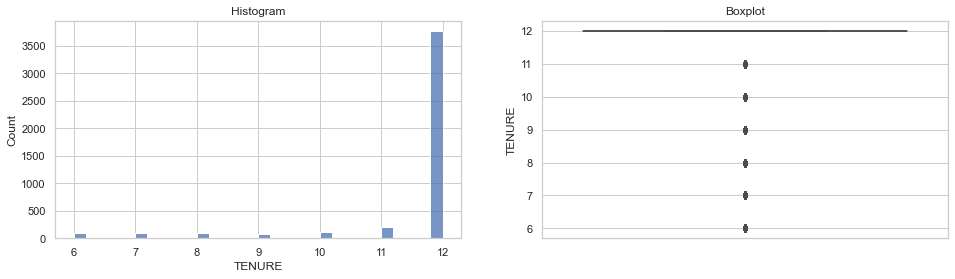


Skewness Value :  -2.9503345802430596


In [34]:
for column in col_num: 
    diagnostic_plots(X_train_censored, column)
    print('\nSkewness Value : ', X_train[column].skew())

After handling, we can see that our outliers are removed our data.

## Handling Missing Values

As we can see, there is no missing values in our the data. so we dont need to handle missing values.

In [35]:
# No need to handle missing values, data dont have Nan
X_train_censored_nonan = X_train_censored

## Feature Selection

### 1. Reasoning

As our analysis before, we can list our feature as:

In [36]:
#Printing features as previosly filtered
def column_type_check():    
    print('All Col :',df.columns.tolist())

    print('')

    print('Categorical features :')
    print('Ordinal :', col_cat_ordinal)
    print('Nominal :', col_cat_nominal)

    print('')

    print('Numerical features :')
    print('Normal :', col_num_normal)
    print('Skewed :', col_num_skewed)
    print('Exremely Skewed :', col_num_skewed_extreme)
    
column_type_check()    

All Col : ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Categorical features :
Ordinal : []
Nominal : []

Numerical features :
Normal : ['CUST_ID', 'PURCHASES_FREQUENCY']
Skewed : ['PURCHASES_INSTALLMENTS_FREQUENCY']
Exremely Skewed : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


from the feature above I choose to drop bill_amt columns because they seems to have no corelation to deafult rate. I'll also sample pay_n columns and skip some of them to reduce corelation between column.

We already determine skewness and categorical features and we can use this list to use correct scaling and encoding method later.

In [37]:
# Listing features to drop
to_drop = ['CUST_ID']

# Dropping features from column data type  lists 
col_num_normal = [col for col in col_num_normal if col not in to_drop]
col_num_skewed = [col for col in col_num_skewed if col not in to_drop]
col_num_skewed_extreme = [col for col in col_num_skewed_extreme if col not in to_drop]
col_cat_ordinal = [col for col in col_cat_ordinal if col not in to_drop]
col_cat_nominal = [col for col in col_cat_nominal if col not in to_drop]

In [38]:
# ReChecking all dropped features
[col for col in df.columns.tolist() if col not in (col_cat_ordinal+col_cat_nominal+col_num_normal+col_num_skewed+col_num_skewed_extreme)]

['CUST_ID']

### Initial VIF

In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = df[col_num].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[col_num].values, i) for i in range(len(df[col_num].columns))]
vif_data["Low_VIF"] = vif_data["VIF"] < 5

print('Dimensionality Reduction Target:', (vif_data["Low_VIF"].sum() + 1))

vif_data

Dimensionality Reduction Target: 11


feature           VIF  Low_VIF
0                            CUST_ID      3.900139     True
1                            BALANCE      4.176224     True
2                  BALANCE_FREQUENCY     17.961314    False
3                          PURCHASES  54338.379323    False
4                   ONEOFF_PURCHASES  31986.485808    False
5             INSTALLMENTS_PURCHASES   9720.327354    False
6                       CASH_ADVANCE      3.545069     True
7                PURCHASES_FREQUENCY     26.590754    False
8         ONEOFF_PURCHASES_FREQUENCY      5.648963    False
9   PURCHASES_INSTALLMENTS_FREQUENCY     17.204885    False
10            CASH_ADVANCE_FREQUENCY      4.788829     True
11                  CASH_ADVANCE_TRX      3.731350     True
12                     PURCHASES_TRX      4.276057     True
13                      CREDIT_LIMIT      4.598504     True
14                          PAYMENTS      3.517594     True
15                  MINIMUM_PAYMENTS      1.398664     True
16                  PRC_FULL_PAYMENT      1.705628     True
17                            TENURE     18.273996    False

We can see that we got some very high VIF values on purchases columns. the other columns though, have a very low VIF score, but we will reduce this later with Scaling and PCA

### 2. Split between Numerical Columns and Categorical Columns

In code below we split the columns by our choosen class like we described above

In [40]:
#Spliting numerical columns into normal, skewed and extremely skewed
X_train_normal = X_train_censored_nonan[col_num_normal]
X_train_skewed = X_train_censored_nonan[col_num_skewed]
X_train_skewed_extreme = X_train_censored_nonan[col_num_skewed_extreme]


#Splitting categorical columns into ordinal and nominal
X_train_ordinal = X_train_censored_nonan[col_cat_ordinal]
X_train_nominal = X_train_censored_nonan[col_cat_nominal]

In [41]:
X_train_nominal.empty

True

## Scaling and Encoding

In [42]:
column_type_check()    

All Col : ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Categorical features :
Ordinal : []
Nominal : []

Numerical features :
Normal : ['PURCHASES_FREQUENCY']
Skewed : ['PURCHASES_INSTALLMENTS_FREQUENCY']
Exremely Skewed : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


### Numerical Data

In [43]:
#Scaling Algorithms
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

for df in [X_train_normal, X_train_skewed, X_train_skewed_extreme]:
    if df.empty == False:
        if df.equals(X_train_normal):
            standard_scaler.fit(X_train_normal)
            X_train_normal_scaled = standard_scaler.transform(X_train_normal)
        if df.equals(X_train_skewed):
            minmax_scaler.fit(X_train_skewed)
            X_train_skewed_scaled = minmax_scaler.transform(X_train_skewed)
        if df.equals(X_train_skewed_extreme):
            robust_scaler.fit(X_train_skewed_extreme)
            X_train_skewed_extreme_scaled = robust_scaler.transform(X_train_skewed_extreme)


We are using Standard Scaler for normally distributed data, MinMax scaler for skewed data and robust scaler for extremely skewed data. Each scaler are designed for specific function and we are splitting our data accordingly to achieve optimal value for our model.

## Concating Data for Modeling

In [44]:
#Concating data as array
X_train_final = np.concatenate([X_train_normal, X_train_skewed_scaled, X_train_skewed_extreme_scaled], axis=1)

In [45]:
#Defining column names
column_names = col_num_normal+col_num_skewed+col_num_skewed_extreme+col_cat_ordinal+col_cat_nominal+['onehot']*0

In [46]:
X_train_final.shape

(4465, 17)

In [47]:
#Model to dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=column_names)

In [48]:
X_train_final_df.describe()

PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY      BALANCE  \
count          4465.000000                       4465.000000  4465.000000   
mean              0.490587                          0.364082     0.270111   
std               0.402997                          0.397706     0.801462   
min               0.000000                          0.000000    -0.451687   
25%               0.083333                          0.000000    -0.387314   
50%               0.500000                          0.166667     0.000000   
75%               0.916667                          0.750000     0.612686   
max               1.000000                          1.000000     2.112686   

       BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count        4465.000000  4465.000000       4465.000000   
mean           -0.613117     0.351484          0.536089   
std             0.997952     0.827319          0.887835   
min            -2.500000    -0.339415         -0.078352   
25%            -1.000000    -0.302135         -0.078352   
50%             0.000000     0.000000          0.000000   
75%             0.000000     0.697865          0.921648   
max             0.000000     2.197865          2.421648   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
count             4465.000000   4465.000000                 4465.000000   
mean                 0.439756      0.608902                    0.347867   
std                  0.847109      0.897570                    0.902609   
min                 -0.194462      0.000000                   -0.333332   
25%                 -0.194462      0.000000                   -0.333332   
50%                  0.000000      0.000000                    0.000000   
75%                  0.805538      1.000000                    0.666668   
max                  2.305538      2.500000                    2.166668   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4465.000000       4465.000000    4465.000000   4465.000000   
mean                 0.521130          0.597872       0.292665      0.291091   
std                  0.726777          0.854205       0.821992      0.688572   
min                  0.000000          0.000000      -0.437500     -0.602041   
25%                  0.000000          0.000000      -0.375000     -0.285714   
50%                  0.000000          0.000000       0.000000      0.000000   
75%                  1.000000          1.000000       0.625000      0.714286   
max                  2.500000          2.500000       2.125000      2.214286   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  4465.000000       4465.000000       4465.000000  4465.000000  
mean      0.315054          0.415475          0.624777    -0.482643  
std       0.838724          0.878989          0.986130     1.330213  
min      -0.572182         -0.466734          0.000000    -6.000000  
25%      -0.326380         -0.205712          0.000000     0.000000  
50%       0.000000          0.000000          0.000000     0.000000  
75%       0.673620          0.794288          1.000000     0.000000  
max       2.173620          2.294288          2.500000     0.000000

### Variance Inflation Factor

In [49]:
def vif_analysis(dataframe):
    dataframe
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns.tolist()

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    vif_data["Low_VIF"] = vif_data["VIF"] < 5

    print('Dimensionality Reduction Target:', (vif_data["Low_VIF"].sum() + 1))

    return vif_data

In [50]:
vif_analysis(X_train_final_df)

Dimensionality Reduction Target: 7


feature        VIF  Low_VIF
0                PURCHASES_FREQUENCY  20.961331    False
1   PURCHASES_INSTALLMENTS_FREQUENCY  21.917630    False
2                            BALANCE   6.563283    False
3                  BALANCE_FREQUENCY   1.658383     True
4                          PURCHASES  17.977583    False
5                   ONEOFF_PURCHASES  12.520030    False
6             INSTALLMENTS_PURCHASES   8.908770    False
7                       CASH_ADVANCE   5.407005    False
8         ONEOFF_PURCHASES_FREQUENCY   7.246696    False
9             CASH_ADVANCE_FREQUENCY  11.670244    False
10                  CASH_ADVANCE_TRX  13.025909    False
11                     PURCHASES_TRX   6.881494    False
12                      CREDIT_LIMIT   2.028634     True
13                          PAYMENTS   2.340203     True
14                  MINIMUM_PAYMENTS   4.564287     True
15                  PRC_FULL_PAYMENT   2.142897     True
16                            TENURE   1.341131     True

We can see that after we scale the data that overall VIF is lower and we can expect to have around 7 final feature dimension after reduction

## Dimensionality Reduction

### PCA

In [51]:
pca_scaled=PCA(n_components=9).fit(X_train_final_df)
pca_scaled.explained_variance_ratio_

array([0.2686532 , 0.23661558, 0.14037018, 0.08316022, 0.07140117,
       0.05432885, 0.04176013, 0.02698706, 0.02399909])

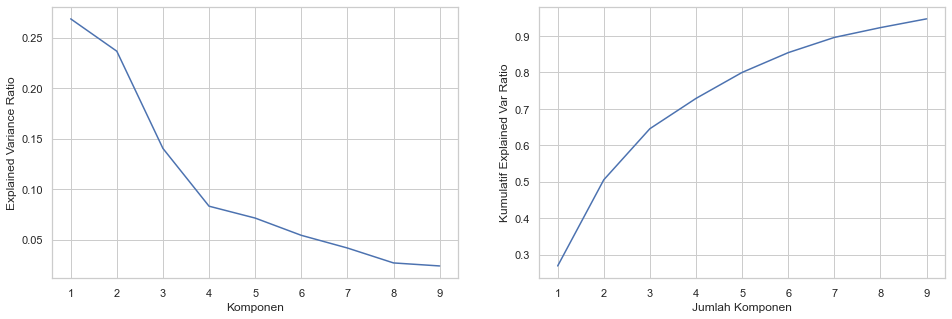

In [52]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,10),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,10),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

We can see that at around 7 component we achieve about 90% cummulative EVR. the elbow from the EVR is around 4 component with about 0.75 Cummulative EVR

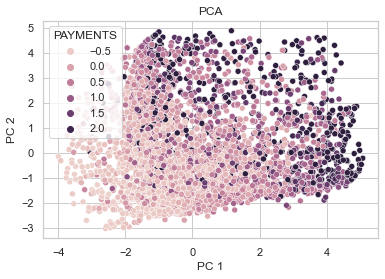

In [53]:
pca_scaled_2=PCA(n_components=2).fit(X_train_final_df)
    
twod=pca_scaled_2.transform(X_train_final_df)

fig,ax=plt.subplots()
sns.scatterplot(x=twod[:,0],y=twod[:,1],hue=X_train_final_df.PAYMENTS)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PCA')
plt.show()

### Kernel PCA

In [54]:
def kernel_pca(data, components, kernel):
    kpca_n_d=KernelPCA(n_components=components,kernel=kernel).fit_transform(data)

    ev_kpca_n_d = np.var(kpca_n_d, axis=0)
    evr_kpca_n_d = ev_kpca_n_d / np.sum(ev_kpca_n_d)

    fig,ax=plt.subplots(ncols=2,figsize=(16,5))
    ax[0].plot(range(1,(components+1)),evr_kpca_n_d)
    ax[0].set_xlabel('Komponen')
    ax[0].set_ylabel('Explained Variance Ratio')

    ax[1].plot(range(1,(components+1)),np.cumsum(evr_kpca_n_d))
    ax[1].set_xlabel('Jumlah Komponen')
    ax[1].set_ylabel('Kumulatif Explained Var Ratio')
    plt.show()
    
    
    kpca_2d=KernelPCA(n_components=2,kernel=kernel).fit(data)

    twod=kpca_2d.transform(data)

    fig,ax=plt.subplots()
    sns.scatterplot(x=twod[:,0],y=twod[:,1],hue=data.PAYMENTS)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_title(('Kernel PCA - '+ kernel))
    plt.show()

---------------------------------------- poly ----------------------------------------


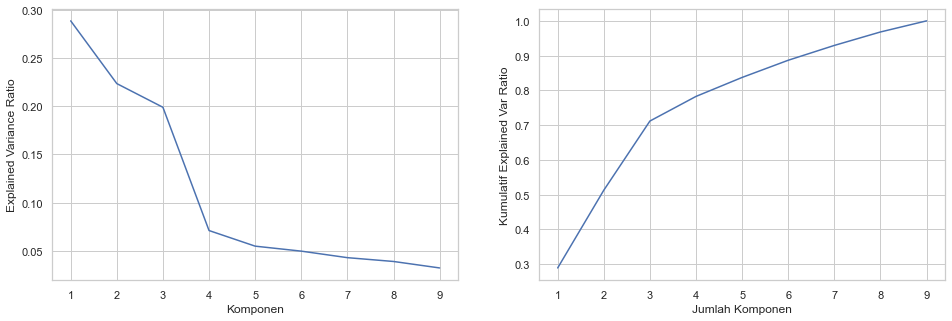

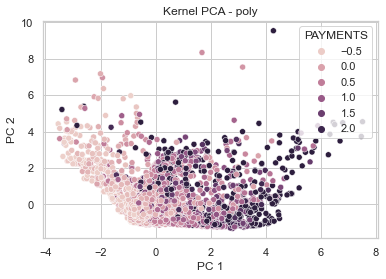

---------------------------------------- rbf ----------------------------------------


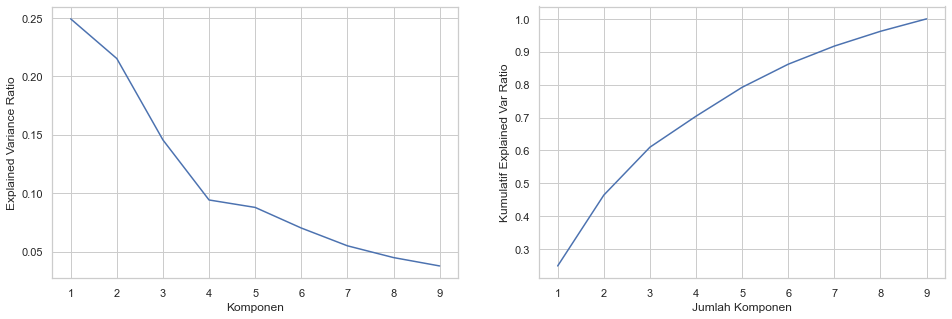

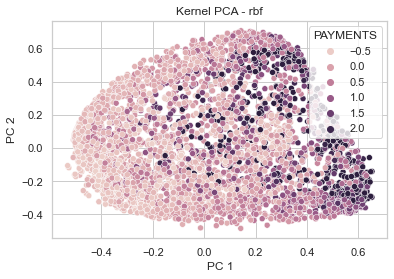

---------------------------------------- sigmoid ----------------------------------------


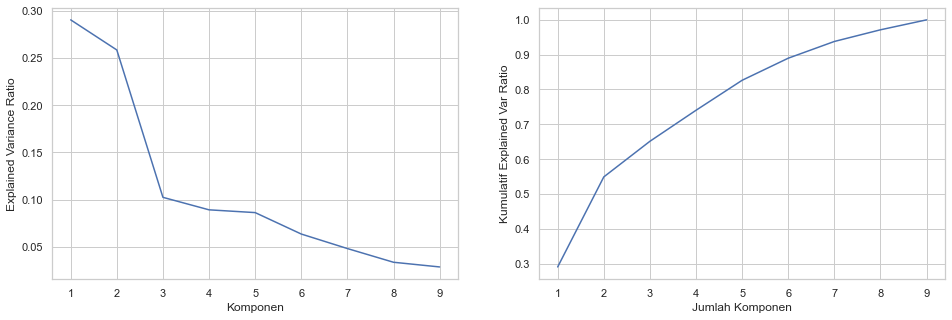

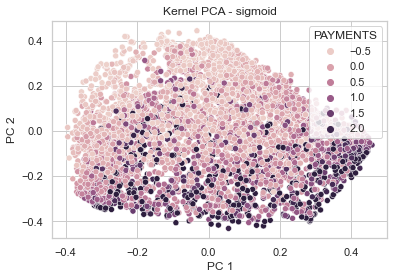

In [55]:
for kernel in ['poly','rbf','sigmoid']:
    print('-'*40,kernel,'-'*40)
    
    kernel_pca(X_train_final_df, 9, kernel)
    

Using kernel PCA doesnt seems to show many improvemnt to the features

## Unsupervised Model

### Apply PCA = 7

I choose to apply PCA 7 component to get 90% of the information and to minimize VIF with lower than 5 value

In [56]:
pca_scaled=PCA(n_components=7).fit(X_train_final_df)
X_pca = pca_scaled.transform(X_train_final_df)

### KMeans

In [57]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Text(0, 0.5, 'Inertia')

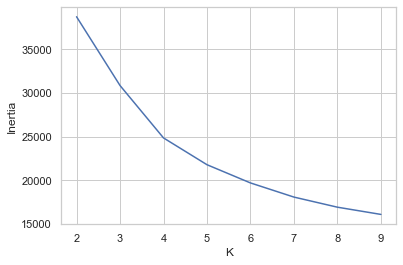

In [58]:
K=[2,3,4,5,6,7,8,9]
inertia=[KMeans(n_clusters=i).fit(X_pca).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

We can see here that the curve is quite smooth and it is difficult to see the elbow. lets see shillouette method for more information

For n_clusters = 2 The average silhouette_score is : 0.25817698563267194
For n_clusters = 3 The average silhouette_score is : 0.2570166748047151
For n_clusters = 4 The average silhouette_score is : 0.28711400474989185
For n_clusters = 5 The average silhouette_score is : 0.2655470964948315
For n_clusters = 6 The average silhouette_score is : 0.268656360127136
For n_clusters = 7 The average silhouette_score is : 0.2698740510674424
For n_clusters = 8 The average silhouette_score is : 0.272072200903619
For n_clusters = 9 The average silhouette_score is : 0.2597916181473364


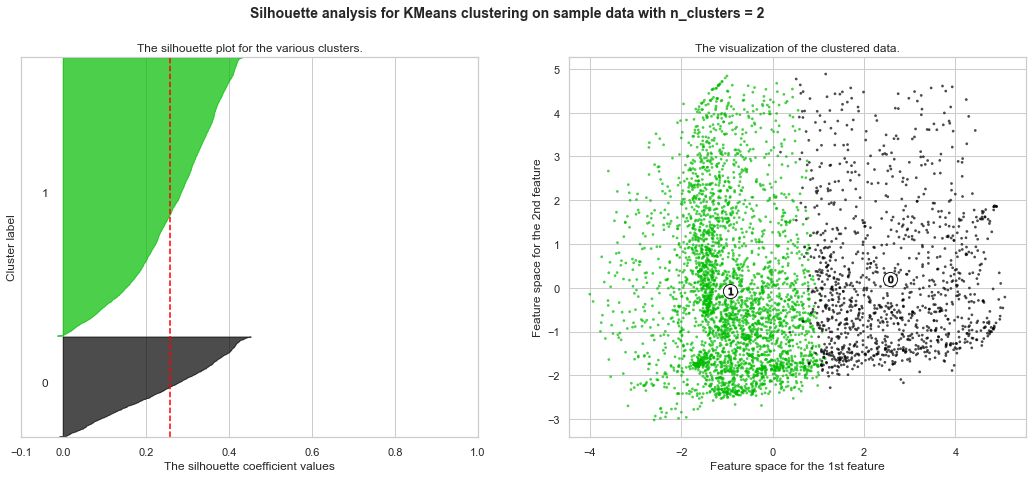

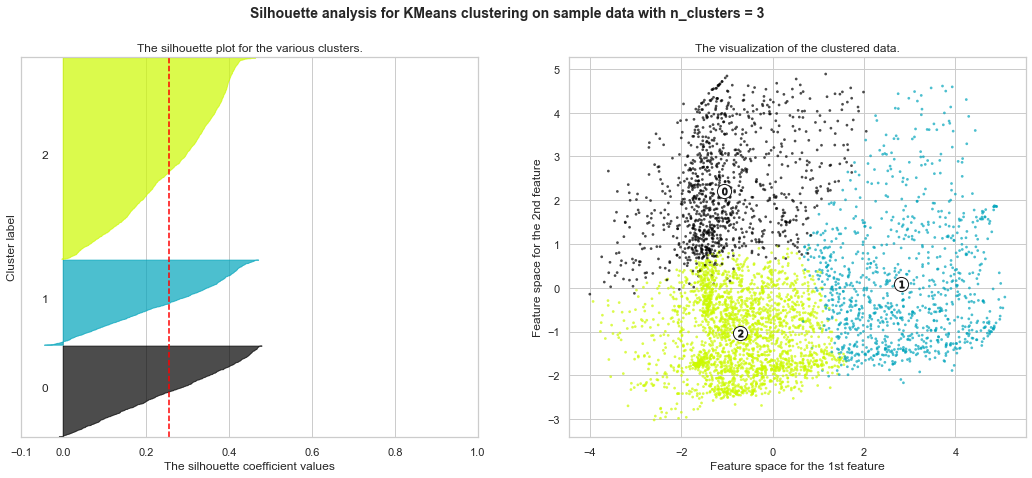

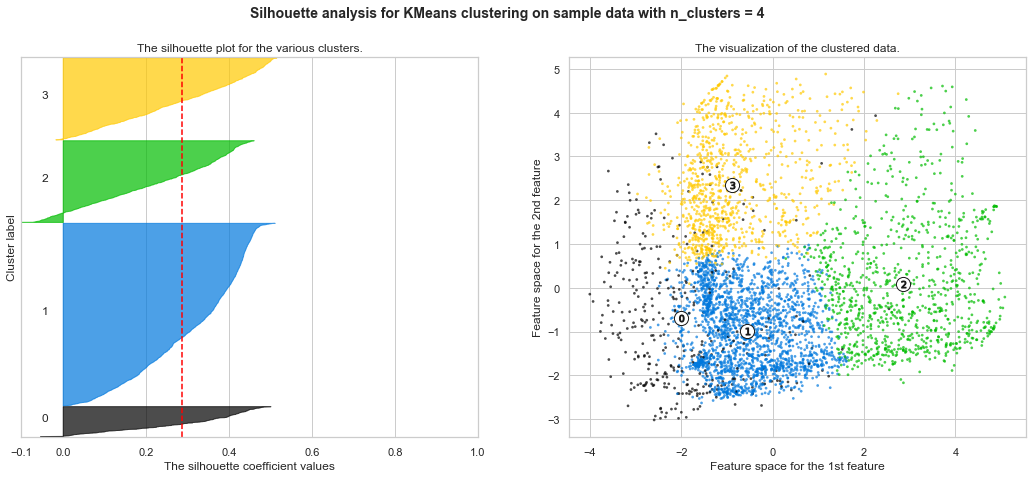

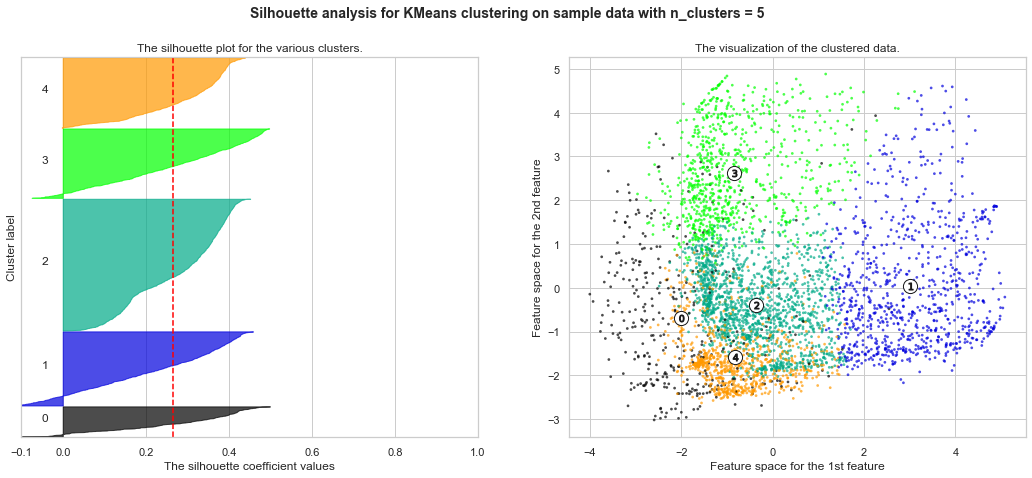

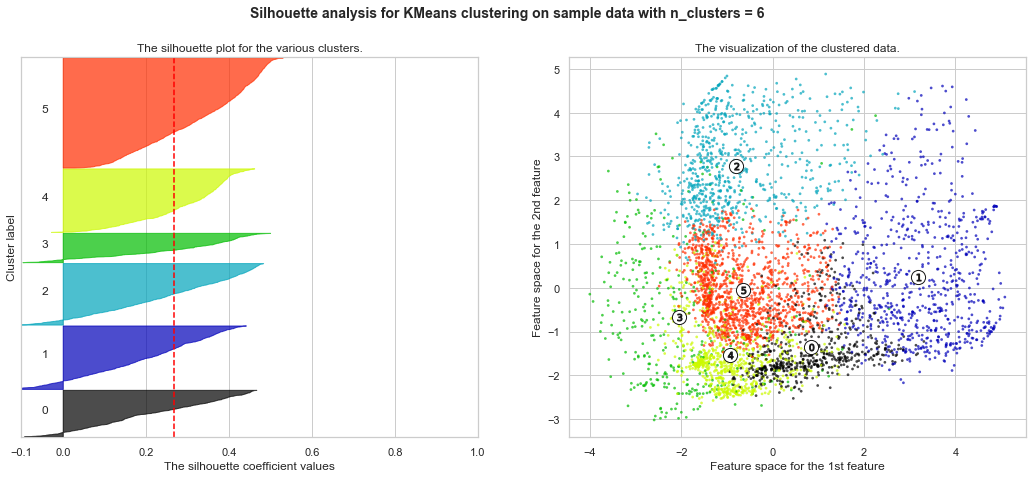

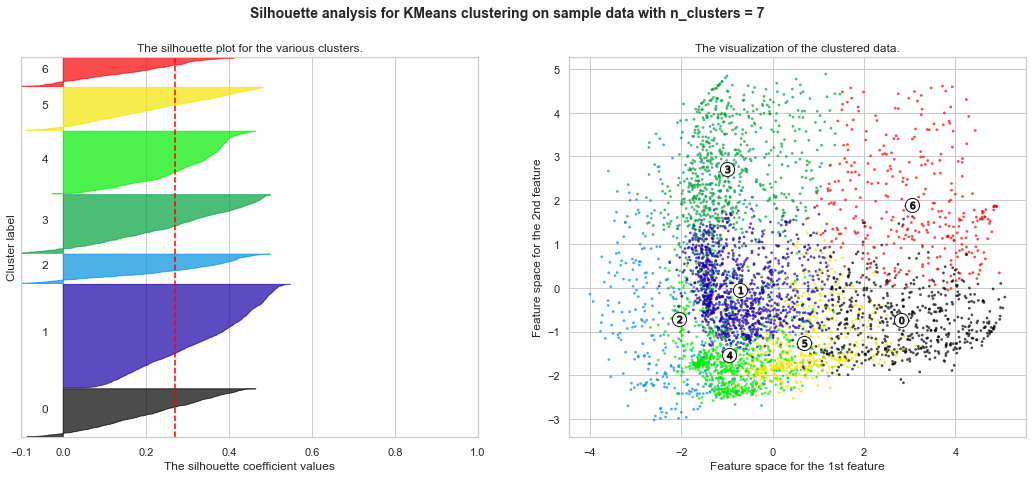

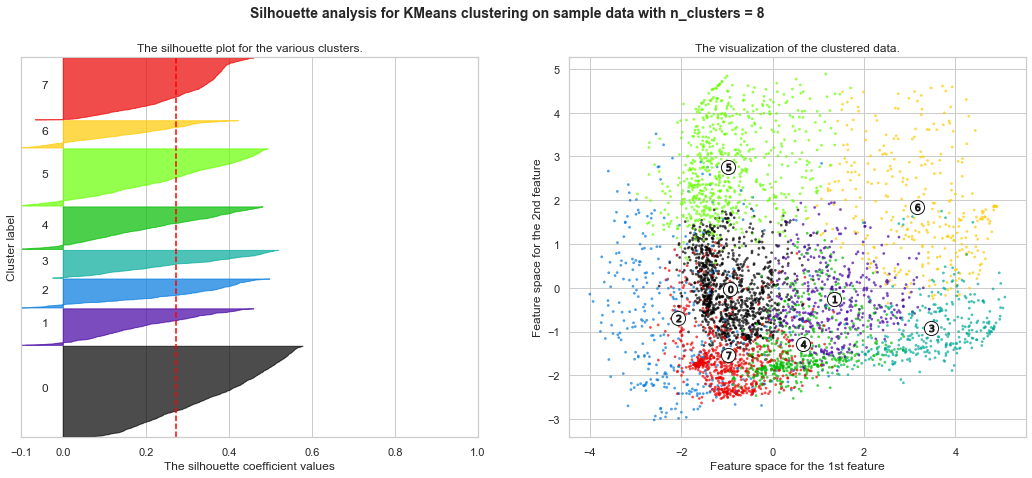

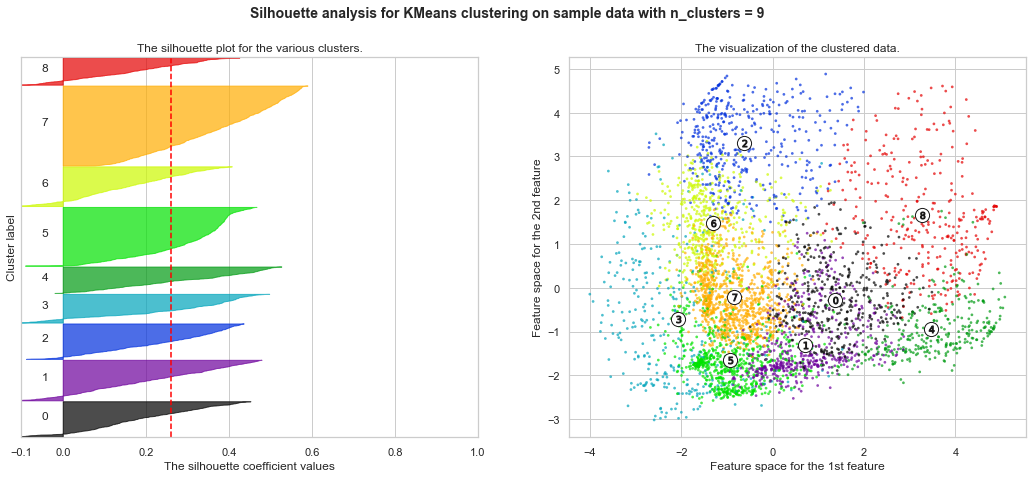

In [59]:
plot_silhouette(K,X_pca)

We can see that aroun n=5 and 6 there is some balance in the shillouete graph, lets apply n=6 for kmeans

### Apply n=6 for kmeans

In [60]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(X_pca)

pred_kmeans = kmeans.predict(X_pca)

### Agglomerative Clustering

In [64]:
agg = AgglomerativeClustering(linkage="ward", n_clusters=6)
pred_agg = agg.fit_predict(X_pca)

## Model Evaluation

In [66]:
pred_kmeans_df = pd.DataFrame(pred_kmeans, columns=['kmeans'])

In [68]:
pred_agg_df = pd.DataFrame(pred_agg, columns=['agg'])

In [70]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC_01','PC_02','PC_03','PC_04','PC_05','PC_06','PC_07'])
Eval_df = pd.concat([X_train.reset_index(), X_pca_df, pred_kmeans_df, pred_agg_df], axis=1)
Eval_df

index  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  \
0         0     3091     3.833185              0.125      45.00   
1         1     5069     0.000000              0.000     176.03   
2         2     6075   757.964752              0.875     157.40   
3         3     6291   264.566591              0.375    1150.00   
4         4     7755   440.613643              1.000     600.00   
...     ...      ...          ...                ...        ...   
4460   4470     2345  9629.808851              1.000       0.00   
4461   4471     6785  1040.030221              1.000       0.00   
4462   4472     7347  1322.818587              1.000       0.00   
4463   4473     8447  1060.391273              1.000       0.00   
4464   4474     1995  3447.674222              1.000     205.00   

      ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0                45.00                     0.0      0.000000   
1               176.03                     0.0      0.000000   
2               157.40                     0.0      0.000000   
3              1150.00                     0.0      0.000000   
4               600.00                     0.0      0.000000   
...                ...                     ...           ...   
4460              0.00                     0.0   4372.393835   
4461              0.00                     0.0   1390.648290   
4462              0.00                     0.0    762.301096   
4463              0.00                     0.0   1475.858013   
4464            205.00                     0.0   4548.057776   

      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  ...  TENURE     PC_01  \
0                0.125000                    0.125000  ...       8 -2.645673   
1                0.125000                    0.125000  ...       8 -2.324024   
2                0.125000                    0.125000  ...       8 -1.721688   
3                0.125000                    0.125000  ...       8 -0.958018   
4                0.125000                    0.125000  ...       8 -1.549434   
...                   ...                         ...  ...     ...       ...   
4460             0.000000                    0.000000  ...      11 -1.515184   
4461             0.000000                    0.000000  ...      11 -2.271303   
4462             0.000000                    0.000000  ...      11 -2.079303   
4463             0.000000                    0.000000  ...      11 -2.245435   
4464             0.090909                    0.090909  ...      11 -1.511447   

         PC_02     PC_03     PC_04     PC_05     PC_06     PC_07  kmeans  agg  
0    -2.190596  2.774814 -0.720231  0.956298  0.859653 -0.082566       5    2  
1    -1.970263  2.855062 -0.500232  1.138947  1.081229  0.434498       5    2  
2    -0.337224  2.653481 -1.604707  0.209505  1.032897  1.308375       5    2  
3    -1.568258  3.375806 -0.081895  1.821373  1.037604  0.248006       5    2  
4    -1.298301  2.712134 -2.009098  0.492506 -0.622593  0.436005       5    2  
...        ...       ...       ...       ...       ...       ...     ...  ...  
4460  4.242044  0.477088  0.546049 -0.356154  0.265599  1.041895       1    1  
4461  1.398925  0.276222  0.008144 -0.176853 -1.323567 -1.335612       1    1  
4462  1.352319  0.241621 -0.010300 -0.164289 -1.199070 -1.111100       1    1  
4463  1.463855  0.294250  0.079158 -0.170745 -1.301961 -1.288161       1    1  
4464  2.851750  0.539787  0.286288  0.113824 -0.503620  0.130502       1    1  

[4465 rows x 28 columns]

In [71]:
Eval_df.describe().T

count          mean          std  \
index                             4465.0  2.238153e+03  1292.163436   
CUST_ID                           4465.0  4.474071e+03  2584.727678   
BALANCE                           4465.0  1.564467e+03  2073.458121   
BALANCE_FREQUENCY                 4465.0  8.769631e-01     0.238245   
PURCHASES                         4465.0  1.002593e+03  2060.305699   
ONEOFF_PURCHASES                  4465.0  5.954906e+02  1653.043656   
INSTALLMENTS_PURCHASES            4465.0  4.073320e+02   881.592789   
CASH_ADVANCE                      4465.0  9.850663e+02  2061.841569   
PURCHASES_FREQUENCY               4465.0  4.905868e-01     0.402997   
ONEOFF_PURCHASES_FREQUENCY        4465.0  2.019995e-01     0.298111   
PURCHASES_INSTALLMENTS_FREQUENCY  4465.0  3.640816e-01     0.397706   
CASH_ADVANCE_FREQUENCY            4465.0  1.361947e-01     0.201063   
CASH_ADVANCE_TRX                  4465.0  3.300560e+00     7.137297   
PURCHASES_TRX                     4465.0  1.491489e+01    25.514639   
CREDIT_LIMIT                      4465.0  4.495718e+03  3610.430757   
PAYMENTS                          4465.0  1.739111e+03  2828.694758   
MINIMUM_PAYMENTS                  4465.0  8.447573e+02  2402.151001   
PRC_FULL_PAYMENT                  4465.0  1.501682e-01     0.289012   
TENURE                            4465.0  1.151736e+01     1.330213   
PC_01                             4465.0 -1.726627e-16     1.824827   
PC_02                             4465.0  1.985820e-15     1.712566   
PC_03                             4465.0 -7.964265e-17     1.319056   
PC_04                             4465.0 -6.070794e-17     1.015274   
PC_05                             4465.0  1.188921e-16     0.940759   
PC_06                             4465.0 -4.699488e-18     0.820618   
PC_07                             4465.0 -1.339230e-16     0.719460   
kmeans                            4465.0  2.454647e+00     1.460890   
agg                               4465.0  2.428667e+00     1.856859   

                                        min          25%          50%  \
index                              0.000000  1119.000000  2239.000000   
CUST_ID                            1.000000  2235.000000  4471.000000   
BALANCE                            0.000000   124.285688   872.071080   
BALANCE_FREQUENCY                  0.000000     0.888889     1.000000   
PURCHASES                          0.000000    39.540000   360.000000   
ONEOFF_PURCHASES                   0.000000     0.000000    45.000000   
INSTALLMENTS_PURCHASES             0.000000     0.000000    88.620000   
CASH_ADVANCE                       0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY         0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY   0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY             0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                   0.000000     0.000000     0.000000   
PURCHASES_TRX                      0.000000     1.000000     7.000000   
CREDIT_LIMIT                      50.000000  1600.000000  3000.000000   
PAYMENTS                           0.000000   376.758504   877.026023   
MINIMUM_PAYMENTS                   0.000000   162.729509   290.977264   
PRC_FULL_PAYMENT                   0.000000     0.000000     0.000000   
TENURE                             6.000000    12.000000    12.000000   
PC_01                             -4.001256    -1.353856    -0.507580   
PC_02                             -3.017280    -1.383408    -0.381250   
PC_03                             -1.340678    -0.801048    -0.424218   
PC_04                             -2.934587    -0.869839    -0.031603   
PC_05                             -2.811080    -0.475804    -0.000680   
PC_06                             -2.485471    -0.580635    -0.063245   
PC_07                             -2.568957    -0.467303    -0.005836   
kmea

<AxesSubplot:xlabel='PC_01', ylabel='PC_02'>

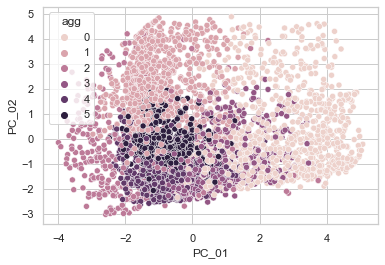

In [72]:
sns.scatterplot(data=Eval_df, x="PC_01", y="PC_02", hue='agg')

<AxesSubplot:xlabel='PC_01', ylabel='PC_02'>

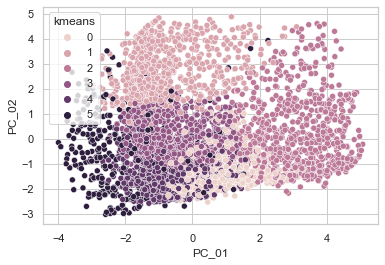

In [73]:
sns.scatterplot(data=Eval_df, x="PC_01", y="PC_02", hue='kmeans')

We can see that the cluster between kmeans and agglomerative clustering are similar

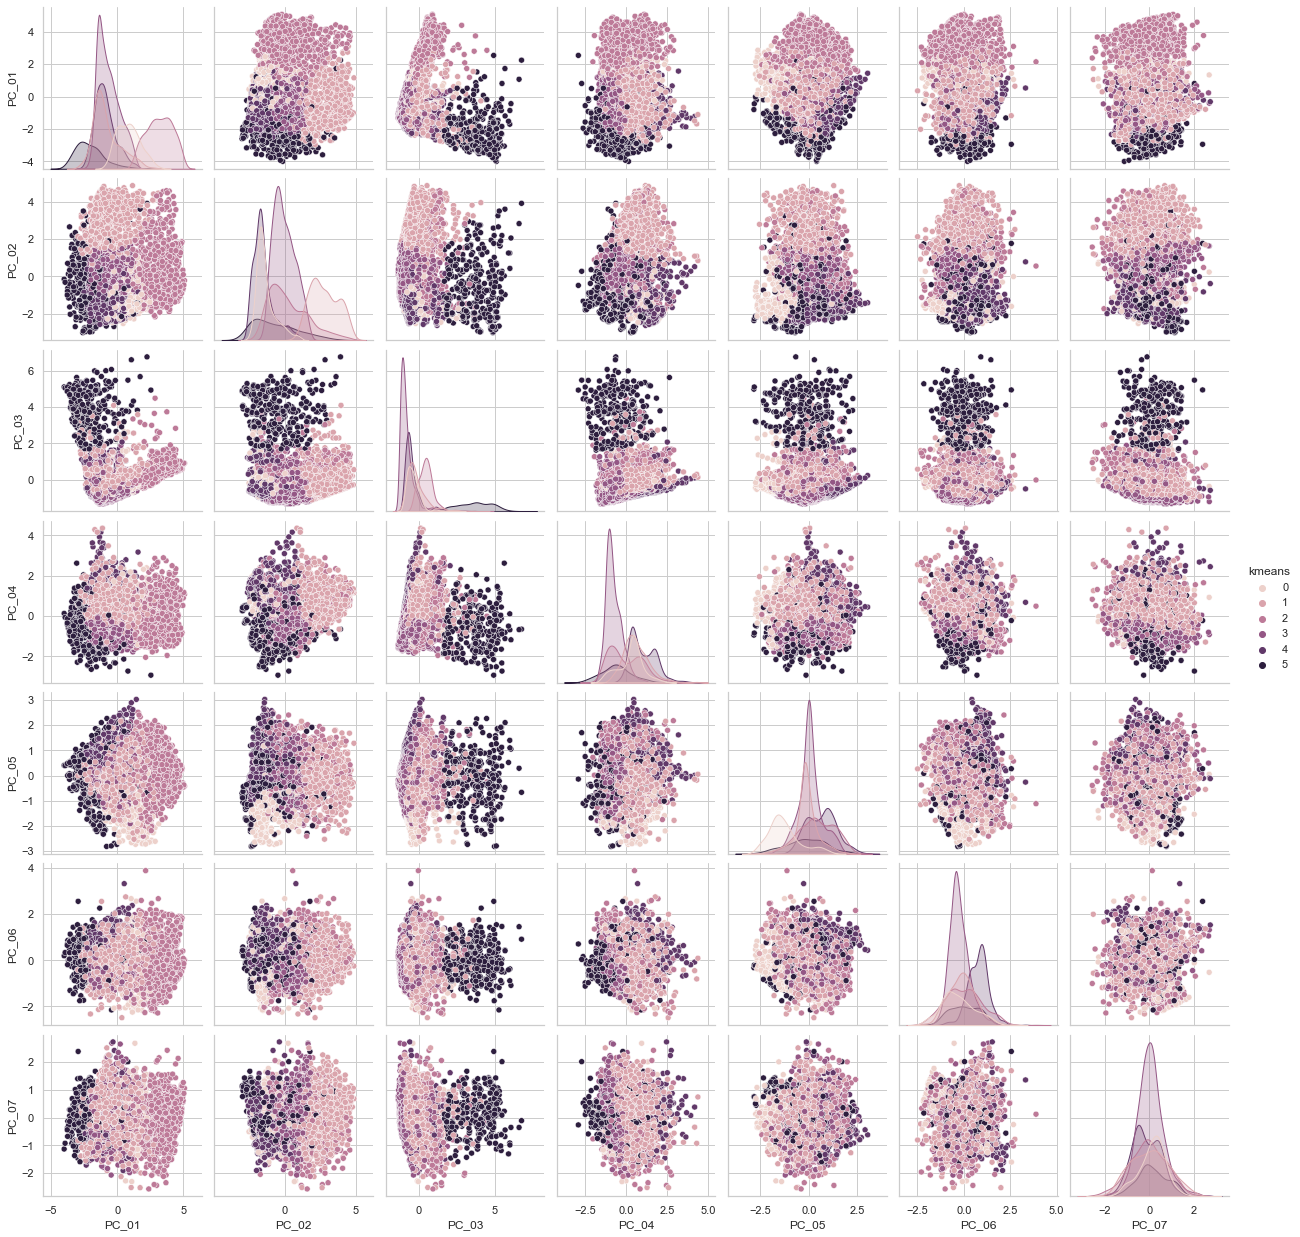

In [82]:
sns.pairplot(Eval_df[X_pca_df.columns.tolist() + ['kmeans']],diag_kind='kde', hue='kmeans')

the clusters are shown clearly on the first 3 columns of PCA but it started to be more vague in the plot between the last 3 columns. lets see if we plot the initial columns in clusters

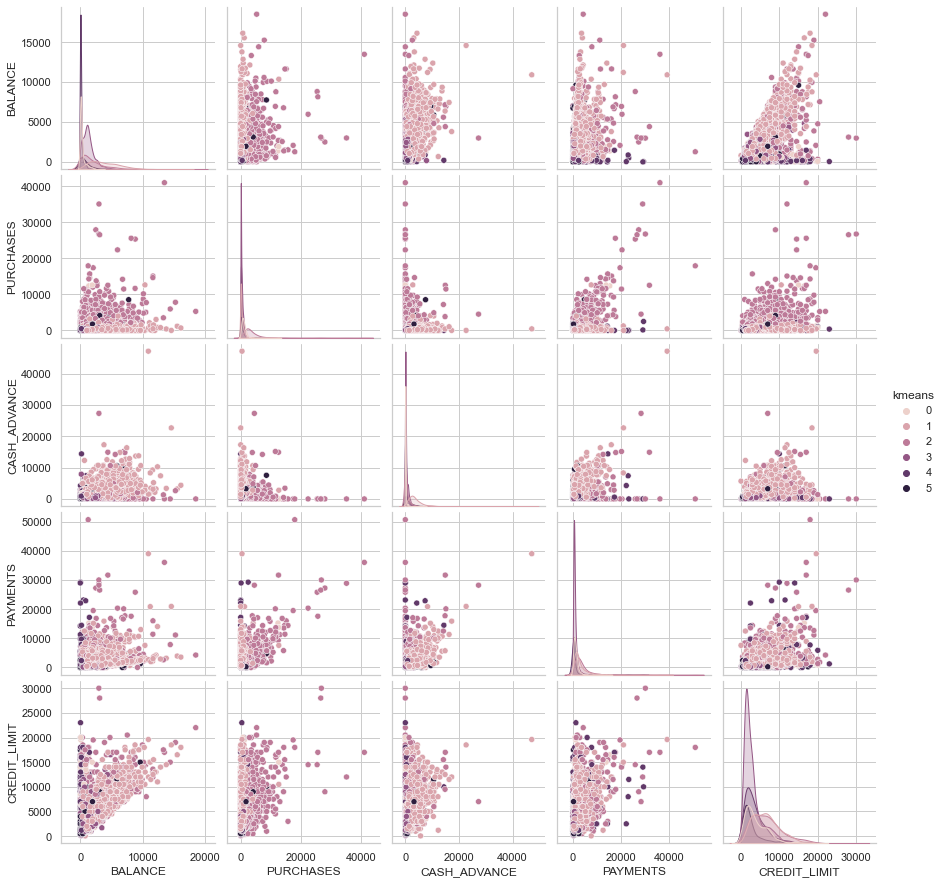

In [79]:
sns.pairplot(Eval_df[['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS', 'CREDIT_LIMIT', 'kmeans']],diag_kind='kde', hue='kmeans')

We can see here that the clusters are not shown very clearly. we need to improve our model.

In [86]:
z = Eval_df.groupby(['kmeans']).describe().T
pd.set_option('display.max_rows', None)
z

kmeans                                             0             1  \
index                            count    556.000000    734.000000   
                                 mean    1285.944245   3522.474114   
                                 std      918.339810    690.591505   
                                 min       63.000000   2333.000000   
                                 25%      605.250000   2751.250000   
                                 50%      970.500000   3640.500000   
                                 75%     1732.250000   4187.750000   
                                 max     4411.000000   4474.000000   
CUST_ID                          count    556.000000    734.000000   
                                 mean    4509.694245   4371.891008   
                                 std     2558.298821   2574.133334   
                                 min        3.000000     23.000000   
                                 25%     2391.000000   2103.000000   
                                 50%     4491.000000   4232.000000   
                                 75%     6608.000000   6610.500000   
                                 max     8937.000000   8947.000000   
BALANCE                          count    556.000000    734.000000   
                                 mean     307.099080   4077.331624   
                                 std      487.903092   2591.380320   
                                 min        1.632453    236.996845   
                                 25%       46.617255   1973.013692   
                                 50%      100.083860   3538.011612   
                                 75%      292.217647   5603.756693   
                                 max     3543.905366  16115.596400   
BALANCE_FREQUENCY                count    556.000000    734.000000   
                                 mean       0.967909      0.972948   
                                 std        0.078829      0.080313   
                                 min        0.363636      0.400000   
                                 25%        1.000000      1.000000   
                                 50%        1.000000      1.000000   
                                 75%        1.000000      1.000000   
                                 max        1.000000      1.000000   
PURCHASES                        count    556.000000    734.000000   
                                 mean    1036.680108    346.242180   
                                 std     1027.408384    727.024225   
                                 min       70.560000      0.000000   
                                 25%      470.460000      0.000000   
                                 50%      820.965000      1.005000   
                                 75%     1295.042500    460.090000   
                                 max    12617.190000  12650.000000   
ONEOFF_PURCHASES                 count    556.000000    734.000000   
                                 mean     181.165378    199.571267   
                                 std      297.629321    589.966290   
                                 min        0.000000      0.000000   
                                 25%        0.000000      0.000000   
                                 50%        0.000000      0.000000   
                                 75%      289.122500    217.875000   
                                 max     1833.900000  12650.000000   
INSTALLMENTS_PURCHASES           count    556.000000    734.000000   
                                 mean     856.593867    146.718215   
                                 std     1038.914623    394.436093   
                                 min        0.000000      0.000000   
                                 25%      334.050000      0.000000   
                                 50%      600.000000      0.000000   
                                 75%     1077.242500    100.000000   
                                 max    12541.000000   4098.650000   
CASH_ADVAN

from the dataframe above, we can see that there is some difference in value of every column divided by clusters, this will be interesting for further exploration.